# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning


## Background
Human resources (HR) are the main assets that need to be managed properly by a company so that business goals can be achieved effectively and efficiently. On this occasion, we will face a problem regarding human resources in the company. Our focus is to find out how to keep employees afloat in an existing company, which can result in increased costs for employee recruitment and training for those who have just entered. By knowing the main factors that cause employees to resign, companies can immediately overcome them by making programs that are relevant to employee problems.  

### Problem  
Many employees have resigned from the company (31%).    

### Goal  
* Reducing the rate of resignation from the company.   
* Increase the retention of employees.    

### Objective
* Create a machine learning model that can predict employees who resign.  
* Provide business recommendations based on the model that has been built.    

### Business Metric
Rate of resignation  


In [2]:
# Import library
import warnings
warnings.filterwarnings('ignore')

# for manipulation data (processing)
import pandas as pd
import numpy as np 
import ppscore as pps
import datetime as dt
from datetime import date
from datetime import datetime as dt

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.express as px

# for EDA
import dataprep
from dataprep.eda import plot_missing
from dataprep.eda import create_report

# for machine learning
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score

# for visualization of feature importance
import shap

In [3]:
# Load data set
df = pd.read_csv('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv',delimiter=',')
df.head()

Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  ...         NomorHP  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral  ...  +6282232522xxx   
1      Sangat_kurang  Jakarta Utara            Website  ...  +6281270745xxx   
2              Bagus  Jakarta Timur             Indeed  ...  +6281346215xxx   
3              Bagus  Jakarta Pusat           LinkedIn  ...  +6283233846xxx   
4              Bagus  Jakarta Timur           LinkedIn  ...  +6287883263xxx   

                             Email  TingkatPendidikan  PernahBekerja  \
0   spiritedPorpoise3135@yahoo.com           Magister              1   
1     jealousGelding2239@yahoo.com            Sarjana              1   
2      pluckyMuesli3961@icloud.com           Magister              1   
3  stressedTruffle1406@hotmail.com            Sarjana              1   
4         shyTermite7149@gmail.com            Sarjana              1   

   IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
0             1.0  masih_bekerja   1972-07-01    2011-01-10   
1             1.0  toxic_culture   1984-04-26    2014-01-06   
2             1.0      jam_kerja   1974-01-07    2011-01-10   
3             0.0  masih_bekerja   1979-11-24     2014-2-17   
4             0.0    ganti_karir   1974-11-07    2013-11-11   

  TanggalPenilaianKaryawan  TanggalResign  
0                2016-2-15              -  
1                2020-1-17      2018-6-16  
2               2016-01-10      2014-9-24  
3               2020-02-04              -  
4                2020-1-22     2018-09-06  

[5 rows x 25 columns]

In [172]:
# Employees resign
df[df['TanggalResign']!='-']

Username  EnterpriseID StatusPernikahan JenisKelamin  \
1      jealousGelding2        106080    Belum_menikah         Pria   
2        pluckyMuesli3        106452          Menikah         Pria   
4          shyTermite7        111171    Belum_menikah       Wanita   
10        puzzledCake4        105548    Belum_menikah         Pria   
11      grizzledSnipe7        111354         Bercerai       Wanita   
..                 ...           ...              ...          ...   
275    spiritedWeaver4        106225          Lainnya         Pria   
276       pluckyMacaw2        106518    Belum_menikah         Pria   
283  yearningPorpoise4        106254                -       Wanita   
284      murkySausage9        110433          Menikah       Wanita   
285      truthfulMoth4        110744    Belum_menikah         Pria   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
1            FullTime                   Data Analyst  Freshgraduate_program   
2            FullTime  Software Engineer (Front End)  Freshgraduate_program   
4            FullTime                Product Manager  Freshgraduate_program   
10           FullTime  Software Engineer (Front End)              Mid_level   
11           FullTime   Software Engineer (Back End)           Senior_level   
..                ...                            ...                    ...   
275          FullTime                Product Manager              Mid_level   
276          FullTime   Software Engineer (Back End)  Freshgraduate_program   
283          FullTime       Product Design (UI & UX)  Freshgraduate_program   
284          FullTime  Software Engineer (Front End)           Senior_level   
285          FullTime    Software Engineer (Android)              Mid_level   

    PerformancePegawai       AsalDaerah      HiringPlatform  ...  \
1        Sangat_kurang    Jakarta Utara             Website  ...   
2                Bagus    Jakarta Timur              Indeed  ...   
4                Bagus    Jakarta Timur            LinkedIn  ...   
10              Kurang    Jakarta Timur       CareerBuilder  ...   
11        Sangat_bagus    Jakarta Barat       CareerBuilder  ...   
..                 ...              ...                 ...  ...   
275              Biasa  Jakarta Selatan            LinkedIn  ...   
276              Bagus    Jakarta Timur       CareerBuilder  ...   
283              Biasa    Jakarta Timur            LinkedIn  ...   
284              Biasa    Jakarta Pusat  Diversity_Job_Fair  ...   
285              Bagus    Jakarta Utara       Google_Search  ...   

            NomorHP                           Email  TingkatPendidikan  \
1    +6281270745xxx    jealousGelding2239@yahoo.com            Sarjana   
2    +6281346215xxx     pluckyMuesli3961@icloud.com           Magister   
4    +6287883263xxx        shyTermite7149@gmail.com            Sarjana   
10   +6281263218xxx      puzzledCake4844@icloud.com            Sarjana   
11   +6289987666xxx   grizzledSnipe7992@outlook.com           Magister   
..              ...                             ...                ...   
275  +6281336578xxx  spiritedWeaver4174@hotmail.com             Doktor   
276  +6285780582xxx      pluckyMacaw2231@icloud.com           Magister   
283  +6281222782xxx  yearningPorpoise4421@yahoo.com            Sarjana   
284  +6285821950xxx      murkySausage9688@yahoo.com            Sarjana   
285  +6287787391xxx      truthfulMoth4663@yahoo.com            Sarjana   

     PernahBekerja  IkutProgramLOP     AlasanResign TanggalLahir  \
1                1             1.0    toxic_culture   1984-04-26   
2                1             1.0        jam_kerja   1974-01-07   
4                1             0.0      ganti_karir   1974-11-07   
10               1             1.0      ganti_karir   1975-12-17   
11               1             NaN    tidak_bahagia   1989-07-18   
..             ...             ...              ...          ...   
275              1             NaN        

In [173]:
print(f'Jumlah resign employee {round((89/287)*100,2)}%')

Jumlah resign employee 31.01%


## Exploring Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [5]:
df['EnterpriseID'].nunique()

287

From the information above, it can be seen that there are some missing values ​​in certain columns. In addition, there are also several data types that do not match the columns, namely the `TanggalLahir`, `TanggalHiring`, `TanggalPenilaianKaryawan`, and `TanggalResign` columns, which have an object data type that will later be changed to datetime. In addition, there is also an `EnterpriseID` column, which has integer type data that will be converted into an object because it shows the ID of each employee.

In [6]:
df.isna().mean().sort_values(ascending=False) * 100


IkutProgramLOP                        89.895470
AlasanResign                          22.996516
JumlahKetidakhadiran                   2.090592
SkorKepuasanPegawai                    1.742160
JumlahKeikutsertaanProjek              1.045296
JumlahKeterlambatanSebulanTerakhir     0.348432
TanggalPenilaianKaryawan               0.000000
TanggalHiring                          0.000000
TanggalLahir                           0.000000
PernahBekerja                          0.000000
TingkatPendidikan                      0.000000
Email                                  0.000000
NomorHP                                0.000000
Username                               0.000000
EnterpriseID                           0.000000
SkorSurveyEngagement                   0.000000
HiringPlatform                         0.000000
AsalDaerah                             0.000000
PerformancePegawai                     0.000000
JenjangKarir                           0.000000
Pekerjaan                              0

  0%|          | 0/262 [00:00<?, ?it/s]


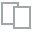
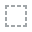
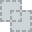
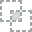
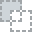
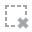
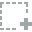
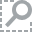
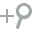
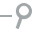
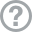
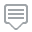
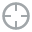
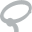
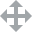
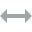
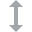
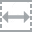
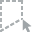
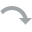
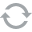
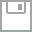
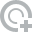
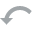
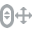
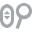
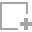
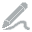
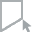
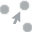
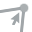
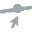

In [7]:
plot_missing(df)

There are 6 columns that contain missing values, `"SkorKepuasanPegawai"`, `"JumlahKeikutsertaanProjek"`, `"JumlahKeterlambatanSebulanTerakhir"`, `"JumlahKetidakhadiran"`, `"IkutProgramLOP"` and `"AlasanResign"`. It can be seen that the column `"IkutProgramLOP"` has a percentage of missing values ​​reaching 80%, this column will be dropped in the next stage. For the column `"AlasanResign"` there are quite a lot of missing values that reach 20%, therefore, this needs to be explored first before deciding whether to drop it or not. Likewise with other features that need further investigation. Let's explore these features.

#### AlasanResign

In [8]:
## AlasanResign
df['AlasanResign'].value_counts()

masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

From the information above it is found that the value that has the most is "masih_bekerja". From this, it can be said that the data entered is not data from all employees who resigned but rather all employees. Assuming that, when the data entry is "masih_bekerja" it means that the employee is still working, while the other reason is the reason for resigning. 
The existence of a missing value in this column can be traced further, namely by comparing it with the `TanggalResign` column to ascertain whether the missing value means that the employee is still working or not. When the `TanggalResign` column is empty or the like, it is assumed that the employee is still working.  
The strange thing found here is the AlasanResign value, that is, with the Product Design (UI & UX) value, this value is the one that should work. So in this case, this value will be replaced with "Lainnya".

In [9]:
df_ar = df[(df['AlasanResign'].isnull()) & (df['TanggalResign']=='-')]
df_ar

Username  EnterpriseID StatusPernikahan JenisKelamin  \
105      scornfulBoa6        111235    Belum_menikah       Wanita   
187    dopeyGatorade1        110836          Menikah         Pria   
189  grudgingMeerkat3        106008    Belum_menikah       Wanita   
190    mellowPudding2        105441         Bercerai       Wanita   
195    boastfulSyrup4        100869          Lainnya         Pria   
..                ...           ...              ...          ...   
279  peacefulChamois3        106257    Belum_menikah       Wanita   
280      anxiousTeal2        111378    Belum_menikah       Wanita   
281      anxiousWasp6        100628         Bercerai         Pria   
282       dopeySheep0        106034    Belum_menikah       Wanita   
286      puzzledFish5        106214          Menikah         Pria   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
105          FullTime                   Data Analyst  Freshgraduate_program   
187          FullTime   Software Engineer (Back End)  Freshgraduate_program   
189         Outsource   Software Engineer (Back End)  Freshgraduate_program   
190          FullTime   Software Engineer (Back End)           Senior_level   
195          FullTime  Software Engineer (Front End)  Freshgraduate_program   
..                ...                            ...                    ...   
279          FullTime       Product Design (UI & UX)  Freshgraduate_program   
280          FullTime   Software Engineer (Back End)              Mid_level   
281          FullTime  Software Engineer (Front End)  Freshgraduate_program   
282          FullTime                  Data Engineer              Mid_level   
286        Internship                   Data Analyst              Mid_level   

    PerformancePegawai       AsalDaerah      HiringPlatform  ...  \
105              Bagus    Jakarta Timur              Indeed  ...   
187              Biasa    Jakarta Barat  Diversity_Job_Fair  ...   
189              Bagus    Jakarta Timur       CareerBuilder  ...   
190              Bagus  Jakarta Selatan   Employee_Referral  ...   
195       Sangat_bagus    Jakarta Timur   Employee_Referral  ...   
..                 ...              ...                 ...  ...   
279              Bagus    Jakarta Pusat            LinkedIn  ...   
280              Bagus    Jakarta Timur   Employee_Referral  ...   
281       Sangat_bagus    Jakarta Pusat              Indeed  ...   
282              Bagus    Jakarta Pusat       Google_Search  ...   
286              Bagus    Jakarta Barat              Indeed  ...   

            NomorHP                           Email  TingkatPendidikan  \
105  +6281335006xxx       scornfulBoa6602@yahoo.com            Sarjana   
187  +6285806554xxx     dopeyGatorade1019@gmail.com            Sarjana   
189  +6285714869xxx  grudgingMeerkat3383@proton.com            Sarjana   
190  +6281218824xxx   mellowPudding2026@outlook.com            Sarjana   
195  +6281209655xxx     boastfulSyrup4371@yahoo.com            Sarjana   
..              ...                             ...                ...   
279  +6282208741xxx  peacefulChamois3574@icloud.com             Doktor   
280  +6289567915xxx       anxiousTeal2015@gmail.com            Sarjana   
281  +6281806218xxx     anxiousWasp6788@outlook.com            Sarjana   
282  +6283343465xxx       dopeySheep0297@icloud.com            Sarjana   
286  +6287722818xxx     puzzledFish5776@hotmail.com            Sarjana   

     PernahBekerja  IkutProgramLOP AlasanResign TanggalLahir TanggalHiring  \
105              1             NaN          NaN   1970-04-24     2013-5-13   
187              1             NaN          NaN   1964-10-12     2010-4-26   
189              1             NaN          NaN   1986-04-17    2011-01-10   
190              1             NaN          NaN   1980-03-02    2012-03-05   
195              1             NaN          NaN   1981-07-11    2015-06-02   
..             ...             ...          ...          ... 

In [10]:
66/287

0.22996515679442509

From the search it was found that the missing value in the `AlasanResign` column indicates that the employee is still working. So that the missing value in this column will be filled with the value "masih_bekerja".

#### JumlahKetidakhadiran

In [11]:
## JumlahKetidakhadiran
df['JumlahKetidakhadiran'].value_counts()

4.0     20
2.0     20
15.0    19
7.0     17
16.0    17
6.0     16
14.0    16
3.0     16
19.0    15
13.0    15
17.0    14
1.0     14
20.0    13
9.0     12
11.0    12
10.0    10
8.0     10
5.0      9
12.0     7
18.0     7
50.0     1
55.0     1
Name: JumlahKetidakhadiran, dtype: int64

From the value in the `JumlahKetidakhadiran` column, there is no value of 0. Therefore, it is assumed that the missing value in this column indicates that the employee is always present. So that in the next stage the missing value in this column will be filled with a value of 0.

##### SkorKepuasanPegawai

In [12]:
## SkorKepuasanPegawai
df['SkorKepuasanPegawai'].value_counts()

3.0    96
5.0    91
4.0    85
2.0     8
1.0     2
Name: SkorKepuasanPegawai, dtype: int64

In [13]:
df['SkorKepuasanPegawai'].isnull().sum()

5

In [14]:
df_skor = df[(df['SkorKepuasanPegawai'].isnull()) & (df['AlasanResign']=='masih_bekerja')]
df_skor

Username  EnterpriseID StatusPernikahan JenisKelamin  \
8         lyingMussel8        110533         Bercerai         Pria   
55   importedApricots7        105820          Menikah       Wanita   
122   puzzledBurritos7        111373    Belum_menikah       Wanita   
166       resolvedCod5        110380    Belum_menikah         Pria   

    StatusKepegawaian                     Pekerjaan           JenjangKarir  \
8            FullTime   Software Engineer (Android)           Senior_level   
55           FullTime  Software Engineer (Back End)  Freshgraduate_program   
122         Outsource   Software Engineer (Android)              Mid_level   
166          FullTime      Product Design (UI & UX)  Freshgraduate_program   

    PerformancePegawai       AsalDaerah     HiringPlatform  ...  \
8        Sangat_kurang  Jakarta Selatan  Employee_Referral  ...   
55               Biasa    Jakarta Barat             Indeed  ...   
122             Kurang    Jakarta Timur           LinkedIn  ...   
166              Biasa    Jakarta Pusat      Google_Search  ...   

            NomorHP                             Email  TingkatPendidikan  \
8    +6281276485xxx        lyingMussel8944@proton.com           Magister   
55   +6289594763xxx  importedApricots7729@hotmail.com            Sarjana   
122  +6281254157xxx    puzzledBurritos7565@icloud.com            Sarjana   
166  +6287879882xxx       resolvedCod5392@outlook.com            Sarjana   

     PernahBekerja  IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
8                1             NaN  masih_bekerja   1980-08-26    2016-07-06   
55               1             0.0  masih_bekerja   1971-10-23     2015-2-16   
122              1             NaN  masih_bekerja   1979-03-10    2012-04-02   
166              1             NaN  masih_bekerja   1970-12-22    2012-04-02   

    TanggalPenilaianKaryawan  TanggalResign  
8                  2020-2-28              -  
55                 2016-1-20              -  
122                2020-1-14              -  
166                2020-1-14              -  

[4 rows x 25 columns]

From the information above, it is found that 4 of the 5 missing values contained in the `SkorKepuasanPegawai` column are for employees who are still working. So for the missing value handle in this column, it is assumed that the Employee Satisfaction Score is at a value of 3, where this value of 3 is also the mode in the `SkorKepuasanPegawai` column.

#### JumlahKeikutsertaanProjek 

In [15]:
## JumlahKeikutsertaanProjek 
df['JumlahKeikutsertaanProjek'].value_counts()

0.0    221
6.0     20
5.0     20
7.0      9
4.0      8
3.0      3
1.0      1
2.0      1
8.0      1
Name: JumlahKeikutsertaanProjek, dtype: int64

From the information above, it is found that there is one dominant value, namely the value 0, so this column can be filled with a value of 0.

#### JumlahKeterlambatanSebulanTerakhir

In [16]:
## JumlahKeterlambatanSebulanTerakhir 
df['JumlahKeterlambatanSebulanTerakhir'].value_counts()

0.0    255
4.0      8
3.0      6
2.0      6
5.0      5
6.0      5
1.0      1
Name: JumlahKeterlambatanSebulanTerakhir, dtype: int64

From the information above, it is found that there is one dominant value, namely the value 0, so this column can be filled with a value of 0.

#### Check overall



In [17]:
cols = list(df.columns)

In [18]:
for i in cols:
    print(f"\nValue count kolom {i}:\n{20*'='}")
    print(df[i].value_counts())


Value count kolom Username:
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: Username, Length: 285, dtype: int64

Value count kolom EnterpriseID:
111065    1
106008    1
100869    1
101560    1
100874    1
         ..
105429    1
106638    1
100919    1
101306    1
106214    1
Name: EnterpriseID, Length: 287, dtype: int64

Value count kolom StatusPernikahan:
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

Value count kolom JenisKelamin:
Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64

Value count kolom StatusKepegawaian:
FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count kolom Pekerjaan:
Software Engineer (Back End)    

In the `PernahBekerja` column, there are two unique values, namely 'yes' and '1' which actually have the same meaning, so this column will be dropped.

What will be done with data preprocessing:  
* Change the data type  
* Drop the `IkutProgramLOP` column because the missing values are very large, which is more than 80%.  
* Fill in the missing value in the `AlasanResign` column with "masih_bekerja".   
* Fill in the missing value in column ` JumlahKetidakhadiran` with a value of 0.  
* Fill in the missing value in the column SkorKepuasanPegawai` with the mode in that column (3.0).  
* Fill in the missing value in the columns `JumlahKeikutsertaanProjek` and `JumlahKeikutsertaanProjek` with the mode in that column (0.0).  
* Drop column `PernahBekerja` as it has only one value.  
* There is a value '-' in the `TanggalResign` column, so it will be filled with a value of -1.   
* There is a '-' value in the `StatusPernikahan` column, so it will be filled with the value 'Other'.  
* There is a value 'Product Design (UI & UX) in the `AlasanResign` column, so this value is replaced with 'Other'.  

## Data Preprocessing

### Change the Data Type

In [19]:
# copy the dataframe
df2 = df.copy()

In [20]:
# change the data type to datetime
df2['EnterpriseID']= df2['EnterpriseID'].astype(str) 
df2['TanggalLahir']=pd.to_datetime(df2['TanggalLahir'])
df2['TanggalHiring']=pd.to_datetime(df2['TanggalHiring'])
df2['TanggalPenilaianKaryawan']=pd.to_datetime(df2['TanggalPenilaianKaryawan'])
df2['TanggalResign']=pd.to_datetime(df2['TanggalResign'],errors='coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    object        
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

### Drop Kolom

Column drop is performed on a column that has many missing values, in this case the `IkutProgramLOP` column, and column drop is performed on features that contain identities related to employees, such as the `Username`, `EnterpriseID`, `NomorHP`, and `Email` columns. Then, also drop the `TanggalPenilaianKaryawan` column because it is not related to the employee but rather to the person assessing the employee. In addition, this is also done in the `PernahBekerja` column because it only has one value.

In [21]:
ls_drop = [ # missing value > 80%
    'IkutProgramLOP',
    # identity
    'Username', 
    'EnterpriseID', 
    'NomorHP',
    'Email',
    # unrelated to employees  
    'TanggalPenilaianKaryawan',
    # has only one value  
    'PernahBekerja'
]

In [22]:
df_drop = df2.drop(ls_drop, axis=1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    object        
 1   JenisKelamin                        287 non-null    object        
 2   StatusKepegawaian                   287 non-null    object        
 3   Pekerjaan                           287 non-null    object        
 4   JenjangKarir                        287 non-null    object        
 5   PerformancePegawai                  287 non-null    object        
 6   AsalDaerah                          287 non-null    object        
 7   HiringPlatform                      287 non-null    object        
 8   SkorSurveyEngagement                287 non-null    int64         
 9   SkorKepuasanPegawai                 282 non-null    float64       
 10  JumlahKeikutsertaanProjek 

#### Handling Missing Values & Incorrect Values

In [23]:
# Handle missing value
df_drop['AlasanResign'].fillna('masih_bekerja', inplace=True)
df_drop['JumlahKetidakhadiran'].fillna(0, inplace=True)
df_drop['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].mode()[0], inplace=True)
df_drop['JumlahKeikutsertaanProjek'].fillna(df_drop['JumlahKeikutsertaanProjek'].mode()[0], inplace=True)
df_drop['JumlahKeterlambatanSebulanTerakhir'].fillna(df_drop['JumlahKeterlambatanSebulanTerakhir'].mode()[0], inplace=True)
df_drop.isnull().sum()

StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     0
JumlahKeikutsertaanProjek               0
JumlahKeterlambatanSebulanTerakhir      0
JumlahKetidakhadiran                    0
TingkatPendidikan                       0
AlasanResign                            0
TanggalLahir                            0
TanggalHiring                           0
TanggalResign                         198
dtype: int64

From the information above, it is clear that there is a missing value in the `TanggalResign` column. This is actually not a missing value. This happens because the process of changing the data type that was originally from an object is changed to a datetime form. While on that date, there is a value of '-' which indicates that the employee is still working. So in this case, it will be filled with a value of -1.

In [24]:
df_drop['TanggalResign'].fillna(-1, inplace=True)

In [25]:
df_drop.isnull().sum()

StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalResign                         0
dtype: int64

In [26]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    287 non-null    object        
 1   JenisKelamin                        287 non-null    object        
 2   StatusKepegawaian                   287 non-null    object        
 3   Pekerjaan                           287 non-null    object        
 4   JenjangKarir                        287 non-null    object        
 5   PerformancePegawai                  287 non-null    object        
 6   AsalDaerah                          287 non-null    object        
 7   HiringPlatform                      287 non-null    object        
 8   SkorSurveyEngagement                287 non-null    int64         
 9   SkorKepuasanPegawai                 287 non-null    float64       
 10  JumlahKeikutsertaanProjek 

In [27]:
# replace the value '-' in the StatusPernikahan column with 'Lainnya'.
df_drop['StatusPernikahan'] = df_drop['StatusPernikahan'].replace({'-':'Lainnya'})

In [28]:
# change the value 'Product Design (UI & UX)' in the '`AlasanResign` column to 'Lainnya'
df_drop['AlasanResign'] = df_drop['AlasanResign'].replace({'Product Design (UI & UX)':'Lainnya'})

#### Handling Outliers

In [29]:
# list of numerical data
list_nums = list(df_drop.select_dtypes(['int64','float64']))
list_nums

['SkorSurveyEngagement',
 'SkorKepuasanPegawai',
 'JumlahKeikutsertaanProjek',
 'JumlahKeterlambatanSebulanTerakhir',
 'JumlahKetidakhadiran']

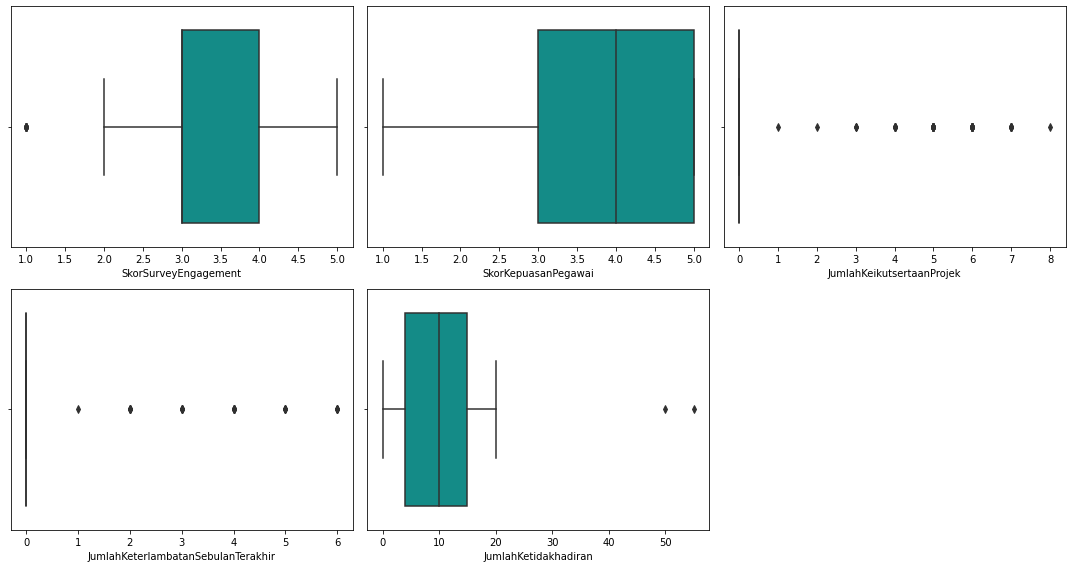

In [30]:
plt.figure(figsize=(15, 8))
for i in range(len(list_nums)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df_drop[list_nums[i]],color='#009f99')
    plt.tight_layout()

Dari informasi diatas dapat dilihat bahwa pada kolom JumlahKetidakhadiran. mari kita cek lebih lanjut.

In [31]:
df_drop[df_drop['JumlahKetidakhadiran']>20]

StatusPernikahan JenisKelamin StatusKepegawaian  \
12           Menikah         Pria          FullTime   
115          Lainnya       Wanita          FullTime   

                         Pekerjaan           JenjangKarir PerformancePegawai  \
12    Software Engineer (Back End)  Freshgraduate_program              Biasa   
115  Software Engineer (Front End)              Mid_level              Biasa   

        AsalDaerah HiringPlatform  SkorSurveyEngagement  SkorKepuasanPegawai  \
12   Jakarta Pusat       LinkedIn                     4                  3.0   
115  Jakarta Pusat  Google_Search                     4                  5.0   

     JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
12                         0.0                                 0.0   
115                        0.0                                 0.0   

     JumlahKetidakhadiran TingkatPendidikan   AlasanResign TanggalLahir  \
12                   50.0          Magister  masih_bekerja   1988-08-10   
115                  55.0           Sarjana  masih_bekerja   1973-01-12   

    TanggalHiring TanggalResign  
12     2013-11-11            -1  
115    2011-11-28            -1

These two values can be dropped because they have a high `JumlahKetidakhadiran` value compared to other employees.

In [32]:
df_drop = df_drop.drop(df_drop[df_drop.JumlahKetidakhadiran>20].index)

## Annual Report on Employee Number Changes

In [33]:
df_ar = df_drop.copy()

In [34]:
df_ar['TanggalResign']=pd.to_datetime(df_ar['TanggalResign'],errors='coerce')
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    285 non-null    object        
 1   JenisKelamin                        285 non-null    object        
 2   StatusKepegawaian                   285 non-null    object        
 3   Pekerjaan                           285 non-null    object        
 4   JenjangKarir                        285 non-null    object        
 5   PerformancePegawai                  285 non-null    object        
 6   AsalDaerah                          285 non-null    object        
 7   HiringPlatform                      285 non-null    object        
 8   SkorSurveyEngagement                285 non-null    int64         
 9   SkorKepuasanPegawai                 285 non-null    float64       
 10  JumlahKeikutsertaanProjek 

In [35]:
# extract year from TanggalResign dan TanggalHiring columns
df_ar['TahunResign'] = pd.DatetimeIndex(df_ar['TanggalResign']).year
df_ar['TahunHiring'] = pd.DatetimeIndex(df_ar['TanggalHiring']).year

### Number of Hiring Employees per Year  

In [36]:
df_hr = df_ar.groupby(['TahunHiring']).size().reset_index(name='JumlahHiringEmployee')
df_hr

TahunHiring  JumlahHiringEmployee
0          2006                     1
1          2007                     2
2          2008                     2
3          2009                     7
4          2010                     8
5          2011                    75
6          2012                    41
7          2013                    42
8          2014                    56
9          2015                    31
10         2016                    14
11         2017                     5
12         2018                     1

### Number of Resigned Employees per Year  

In [37]:
df_rs = df_ar.groupby(['TahunResign']).size().reset_index(name='JumlahEmployeeResign')
df_rs

TahunResign  JumlahEmployeeResign
0       2013.0                     5
1       2014.0                    12
2       2015.0                     8
3       2016.0                     8
4       2017.0                    19
5       2018.0                    26
6       2019.0                     5
7       2020.0                     6

### Joining Table

To join the table for the number of employees hiring and the number of employees resigning, use the outer join so that the years in hiring and resigning can be united.  

In [38]:
# join or merge two dataframe
df_join=pd.merge(df_hr,df_rs,
               left_on='TahunHiring',
               right_on='TahunResign',
               how='outer')
df_join

TahunHiring  JumlahHiringEmployee  TahunResign  JumlahEmployeeResign
0        2006.0                   1.0          NaN                   NaN
1        2007.0                   2.0          NaN                   NaN
2        2008.0                   2.0          NaN                   NaN
3        2009.0                   7.0          NaN                   NaN
4        2010.0                   8.0          NaN                   NaN
5        2011.0                  75.0          NaN                   NaN
6        2012.0                  41.0          NaN                   NaN
7        2013.0                  42.0       2013.0                   5.0
8        2014.0                  56.0       2014.0                  12.0
9        2015.0                  31.0       2015.0                   8.0
10       2016.0                  14.0       2016.0                   8.0
11       2017.0                   5.0       2017.0                  19.0
12       2018.0                   1.0       2018.0                  26.0
13          NaN                   NaN       2019.0                   5.0
14          NaN                   NaN       2020.0                   6.0

The NaN values in the table are due to the fact that there are no years in the existing data or in the employee dataset that is still working, which has a value in the Resign Date column, namely '-'. When extracting the year value, it will produce NaN. Therefore, the value will then be filled in with the following details:
* The fields for `TahunHiring` and `TahunResign` will be filled with a value of '-'.
* in the `JumlahHiringEmployee` and `JumlahEmployeeResign` fields, fill in 0.

In [39]:
df_join['TahunHiring']=df_join['TahunHiring'].fillna('-')
df_join['TahunResign']=df_join['TahunResign'].fillna('-')
df_join['JumlahHiringEmployee']=df_join['JumlahHiringEmployee'].fillna(0)
df_join['JumlahEmployeeResign']=df_join['JumlahEmployeeResign'].fillna(0)
df_join

TahunHiring  JumlahHiringEmployee TahunResign  JumlahEmployeeResign
0       2006.0                   1.0           -                   0.0
1       2007.0                   2.0           -                   0.0
2       2008.0                   2.0           -                   0.0
3       2009.0                   7.0           -                   0.0
4       2010.0                   8.0           -                   0.0
5       2011.0                  75.0           -                   0.0
6       2012.0                  41.0           -                   0.0
7       2013.0                  42.0      2013.0                   5.0
8       2014.0                  56.0      2014.0                  12.0
9       2015.0                  31.0      2015.0                   8.0
10      2016.0                  14.0      2016.0                   8.0
11      2017.0                   5.0      2017.0                  19.0
12      2018.0                   1.0      2018.0                  26.0
13           -                   0.0      2019.0                   5.0
14           -                   0.0      2020.0                   6.0

From the table above, it can be seen that there are two descriptions of the year, namely the `TahunHiring`and the `TahunResign`. Then it will be made into one so that the only columns that exist are `Tahun`, `JumlahHiringEmployee` and `JumlahEmployeeResign`.

In [40]:
df_join['Tahun']= df_join.apply(lambda x: x['TahunHiring'] if x['TahunResign'] == '-' else x['TahunResign'], axis=1) 
df_join.drop(['TahunHiring','TahunResign'], axis=1, inplace=True)
df_join['JumlahHiringEmployee'] = df_join['JumlahHiringEmployee'].astype(int)
df_join['JumlahEmployeeResign'] = df_join['JumlahEmployeeResign'].astype(int)
df_join['Tahun'] = df_join['Tahun'].astype(int)
df_join

JumlahHiringEmployee  JumlahEmployeeResign  Tahun
0                      1                     0   2006
1                      2                     0   2007
2                      2                     0   2008
3                      7                     0   2009
4                      8                     0   2010
5                     75                     0   2011
6                     41                     0   2012
7                     42                     5   2013
8                     56                    12   2014
9                     31                     8   2015
10                    14                     8   2016
11                     5                    19   2017
12                     1                    26   2018
13                     0                     5   2019
14                     0                     6   2020

In [41]:
# change the position of columns
df_join = df_join.reindex(columns=['Tahun','JumlahHiringEmployee','JumlahEmployeeResign'])
# create TotalKaryawanMasuk column
df_join['TotalKaryawanMasuk'] = df_join['JumlahHiringEmployee'].cumsum()
# create TotalKaryawanResign column
df_join['TotalKaryawanResign'] = df_join['JumlahEmployeeResign'].cumsum()
# create TotalKaryawan column
df_join['TotalKaryawan'] = df_join['TotalKaryawanMasuk'] - df_join['TotalKaryawanResign'] 
df_join

Tahun  JumlahHiringEmployee  JumlahEmployeeResign  TotalKaryawanMasuk  \
0    2006                     1                     0                   1   
1    2007                     2                     0                   3   
2    2008                     2                     0                   5   
3    2009                     7                     0                  12   
4    2010                     8                     0                  20   
5    2011                    75                     0                  95   
6    2012                    41                     0                 136   
7    2013                    42                     5                 178   
8    2014                    56                    12                 234   
9    2015                    31                     8                 265   
10   2016                    14                     8                 279   
11   2017                     5                    19                 284   
12   2018                     1                    26                 285   
13   2019                     0                     5                 285   
14   2020                     0                     6                 285   

    TotalKaryawanResign  TotalKaryawan  
0                     0              1  
1                     0              3  
2                     0              5  
3                     0             12  
4                     0             20  
5                     0             95  
6                     0            136  
7                     5            173  
8                    17            217  
9                    25            240  
10                   33            246  
11                   52            232  
12                   78            207  
13                   83            202  
14                   89            196

Text(2004, 315, 'Penurunan jumlah karyawan ini ditandai dengan banyaknya karyawan yang keluar dibandingkan yang masuk.\nHal ini perlu dibenahi agar karyawan lain tetap bertahan sehingga rancangan strategi jangka panjang tetap dapat dilaksanakan tanpa kendala.')

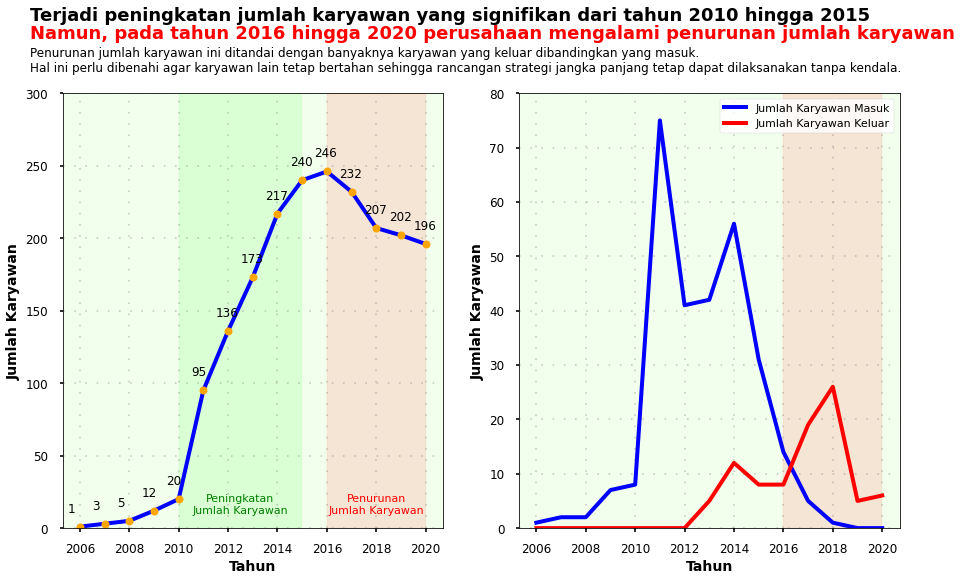

In [42]:
# Visualization
style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(1,2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

# Plot
x = df_join['Tahun']
y = df_join['TotalKaryawan']
n = zip(df_join['Tahun'], df_join['TotalKaryawan'])
# line plot
ax[0].plot(df_join['Tahun'], df_join['TotalKaryawan'], 
        marker='o' ,mfc='orange', ms=8,
        color='blue', linewidth = 4)
# Plot value for each point
for i, txt in enumerate(n):
        ax[0].annotate(txt[1], (x[i]-0.5, y[i]+10), fontsize=12)

ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_facecolor('#f3ffed')
ax[0].grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 6), alpha=0.4)
ax[0].grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 6), alpha=0.4)
# ax[0].axvline(2010, ls='--', color='green')
# ax[0].axvline(2015, ls='--', color='green')
ax[0].stackplot(np.arange(2010,2016,1),[[300]], color='lime', alpha=0.1)
ax[0].text(x=2012.5, y=10, s='Peningkatan\nJumlah Karyawan', ha='center',fontsize=11, color='green')
# ax[0].axvline(2016, ls='--', color='red')
# ax[0].axvline(2020, ls='--', color='red')
ax[0].stackplot(np.arange(2016,2021,1),[[300]], color='red', alpha=0.1)
ax[0].text(x=2018, y=10, s='Penurunan\nJumlah Karyawan',  ha='center', fontsize=11, color='red')
ax[0].set_xlabel('Tahun', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Jumlah Karyawan', fontsize=14, fontweight='bold')
ax[0].set_ylim(0, 300)

# Plot to see the comparison of the number of employees entering and leaving each year
# plot the number of employees entered
ax[1].plot(df_join['Tahun'], df_join['JumlahHiringEmployee'], 
        # marker='o' ,mfc='orange',ms=8,
        color='blue', linewidth = 4, label = "Jumlah Karyawan Masuk")
# plot the number of employees leaving
ax[1].plot(df_join['Tahun'], df_join['JumlahEmployeeResign'], 
        # marker='o' ,mfc='orange',ms=8,
        color='red', linewidth = 4, label="Jumlah Karyawan Keluar")    

ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_facecolor('#f3ffed')
ax[1].grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 6), alpha=0.4)
ax[1].grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 6), alpha=0.4)
ax[1].legend(fontsize=11)
# ax[1].axvline(2017, ls='--', color='red')
# ax[1].axvline(2020, ls='--', color='red')
ax[1].stackplot(np.arange(2016,2021,1),[[80]], color='red', alpha=0.1)
ax[1].set_xlabel('Tahun', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Jumlah Karyawan', fontsize=14, fontweight='bold')
ax[1].set_ylim(0, 80)

# Plot text
ax[0].text(x=2004, y =350,  s="Terjadi peningkatan jumlah karyawan yang signifikan dari tahun 2010 hingga 2015", color='black', fontsize=18, fontweight='bold')
ax[0].text(x=2004, y =338,  s="Namun, pada tahun 2016 hingga 2020 perusahaan mengalami penurunan jumlah karyawan", color='red', fontsize=18, fontweight='bold')
ax[0].text(x=2004, y =315,  s="Penurunan jumlah karyawan ini ditandai dengan banyaknya karyawan yang keluar dibandingkan yang masuk.\nHal ini perlu dibenahi agar karyawan lain tetap bertahan sehingga rancangan strategi jangka panjang tetap dapat dilaksanakan tanpa kendala.", color='black', fontsize=12)


There was a significant increase in the number of employees from 2010 to 2015. However, from 2016 to 2020, the company experienced a decrease in the number of employees. The decrease in the number of employees was marked by the number of employees leaving compared to those entering. This needs to be addressed so that other employees can survive and long-term strategic plans can still be implemented without problems. 

## Resign Reason Analysis for Employee Attrition Management Strategy


In [43]:
df_rr = df_drop.copy()

In [44]:
df_rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    285 non-null    object        
 1   JenisKelamin                        285 non-null    object        
 2   StatusKepegawaian                   285 non-null    object        
 3   Pekerjaan                           285 non-null    object        
 4   JenjangKarir                        285 non-null    object        
 5   PerformancePegawai                  285 non-null    object        
 6   AsalDaerah                          285 non-null    object        
 7   HiringPlatform                      285 non-null    object        
 8   SkorSurveyEngagement                285 non-null    int64         
 9   SkorKepuasanPegawai                 285 non-null    float64       
 10  JumlahKeikutsertaanProjek 

To determine which employees are resigning, you can look at the `TanggalResign` column. Employees who resign will have a value in this column.

In [45]:
df_rr['TanggalResign'] = df_rr['TanggalResign'].astype(str)

In [46]:
df_rr['TanggalResign'].value_counts()

-1                     196
2018-04-01 00:00:00      9
2014-08-19 00:00:00      9
2018-06-08 00:00:00      9
2017-11-15 00:00:00      9
2013-05-30 00:00:00      4
2020-08-19 00:00:00      2
2014-09-24 00:00:00      2
2015-04-01 00:00:00      1
2016-01-11 00:00:00      1
2016-10-31 00:00:00      1
2017-12-15 00:00:00      1
2015-06-18 00:00:00      1
2014-04-07 00:00:00      1
2017-04-15 00:00:00      1
2015-06-05 00:00:00      1
2017-11-14 00:00:00      1
2018-09-15 00:00:00      1
2019-09-26 00:00:00      1
2017-09-05 00:00:00      1
2016-04-24 00:00:00      1
2017-06-04 00:00:00      1
2016-01-09 00:00:00      1
2017-12-12 00:00:00      1
2016-03-31 00:00:00      1
2015-04-15 00:00:00      1
2020-09-26 00:00:00      1
2020-04-29 00:00:00      1
2015-01-09 00:00:00      1
2018-11-15 00:00:00      1
2018-06-16 00:00:00      1
2018-09-06 00:00:00      1
2019-01-12 00:00:00      1
2018-09-19 00:00:00      1
2019-04-06 00:00:00      1
2019-08-04 00:00:00      1
2017-09-12 00:00:00      1
2

The value -1 in the `TanggalResign` column is because the initial value is not a datetime but NaT so when it is converted to a string, it will be '-1'. Therefore, to retrieve data on employees who have resigned, the data taken is data that does not have a '-1' value in the `TanggalResign` column.

### Resigned employees

In [47]:
df_wrr = df_rr[df_rr['TanggalResign']!='-1'] #  create dataframe without '-1'  value in TanggalResign column

In [48]:
## resigned employee group by Pekerjaan 
df_wrr_select = df_wrr[['Pekerjaan']]
df_rgp = df_wrr_select.groupby(['Pekerjaan']).size().reset_index()
df_rgp.columns= ['Pekerjaan','JumlahKaryawanResign']
df_rgp =df_rgp.sort_values(by='JumlahKaryawanResign', ascending=False)
df_rgp

Pekerjaan  JumlahKaryawanResign
5   Software Engineer (Back End)                    28
6  Software Engineer (Front End)                    28
2       Product Design (UI & UX)                     9
0                   Data Analyst                     8
4    Software Engineer (Android)                     7
3                Product Manager                     6
1                  Data Engineer                     3

### Employees who do not resign

In [49]:
df_wr= df_rr[df_rr['TanggalResign']=='-1'] # create dataframe with contains '-1' value in TanggalResign column

In [50]:
## Employees who dont resign group by Pekerjaan 
df_wr_select = df_wr[['Pekerjaan']]
df_gp = df_wr_select.groupby(['Pekerjaan']).size().reset_index()
df_gp.columns= ['Pekerjaan','JumlahKaryawanYangTidakResign']
df_gp =df_gp.sort_values(by='JumlahKaryawanYangTidakResign', ascending=False)
df_gp

Pekerjaan  JumlahKaryawanYangTidakResign
11    Software Engineer (Back End)                             80
12   Software Engineer (Front End)                             43
10     Software Engineer (Android)                             17
5         Product Design (UI & UX)                             15
7                  Product Manager                             11
0                     Data Analyst                              8
1                    Data Engineer                              7
2                  DevOps Engineer                              3
8                     Scrum Master                              3
13         Software Engineer (iOS)                              3
3          Digital Product Manager                              2
4        Machine Learning Engineer                              2
6   Product Design (UX Researcher)                              1
9               Software Architect                              1

### Joining Table

In [51]:
join_work =df_rgp.merge(df_gp,
               left_on='Pekerjaan',
               right_on='Pekerjaan',
               how='outer')
join_work

Pekerjaan  JumlahKaryawanResign  \
0     Software Engineer (Back End)                  28.0   
1    Software Engineer (Front End)                  28.0   
2         Product Design (UI & UX)                   9.0   
3                     Data Analyst                   8.0   
4      Software Engineer (Android)                   7.0   
5                  Product Manager                   6.0   
6                    Data Engineer                   3.0   
7                  DevOps Engineer                   NaN   
8                     Scrum Master                   NaN   
9          Software Engineer (iOS)                   NaN   
10         Digital Product Manager                   NaN   
11       Machine Learning Engineer                   NaN   
12  Product Design (UX Researcher)                   NaN   
13              Software Architect                   NaN   

    JumlahKaryawanYangTidakResign  
0                              80  
1                              43  
2                              15  
3                               8  
4                              17  
5                              11  
6                               7  
7                               3  
8                               3  
9                               3  
10                              2  
11                              2  
12                              1  
13                              1

From the table above, there is still a NaN value; it will be filled with a value of 0. because the NaN value itself represents a value of 0.

In [52]:
join_work['JumlahKaryawanResign'] = join_work['JumlahKaryawanResign'].fillna(0)
join_work

Pekerjaan  JumlahKaryawanResign  \
0     Software Engineer (Back End)                  28.0   
1    Software Engineer (Front End)                  28.0   
2         Product Design (UI & UX)                   9.0   
3                     Data Analyst                   8.0   
4      Software Engineer (Android)                   7.0   
5                  Product Manager                   6.0   
6                    Data Engineer                   3.0   
7                  DevOps Engineer                   0.0   
8                     Scrum Master                   0.0   
9          Software Engineer (iOS)                   0.0   
10         Digital Product Manager                   0.0   
11       Machine Learning Engineer                   0.0   
12  Product Design (UX Researcher)                   0.0   
13              Software Architect                   0.0   

    JumlahKaryawanYangTidakResign  
0                              80  
1                              43  
2                              15  
3                               8  
4                              17  
5                              11  
6                               7  
7                               3  
8                               3  
9                               3  
10                              2  
11                              2  
12                              1  
13                              1

### Create Columns for Total Employees and The Percentage of Employees who are still working (not yet resigned)

In [53]:
join_work['TotalKaryawan'] = join_work['JumlahKaryawanResign'] + join_work['JumlahKaryawanYangTidakResign']
join_work['PersentaseKaryawanAktif'] = round((join_work['JumlahKaryawanYangTidakResign']/join_work['TotalKaryawan'])*100,2)
join_work['PersentaseKaryawanResign'] = round((join_work['JumlahKaryawanResign']/join_work['TotalKaryawan'])*100,2)
join_work

Pekerjaan  JumlahKaryawanResign  \
0     Software Engineer (Back End)                  28.0   
1    Software Engineer (Front End)                  28.0   
2         Product Design (UI & UX)                   9.0   
3                     Data Analyst                   8.0   
4      Software Engineer (Android)                   7.0   
5                  Product Manager                   6.0   
6                    Data Engineer                   3.0   
7                  DevOps Engineer                   0.0   
8                     Scrum Master                   0.0   
9          Software Engineer (iOS)                   0.0   
10         Digital Product Manager                   0.0   
11       Machine Learning Engineer                   0.0   
12  Product Design (UX Researcher)                   0.0   
13              Software Architect                   0.0   

    JumlahKaryawanYangTidakResign  TotalKaryawan  PersentaseKaryawanAktif  \
0                              80          108.0                    74.07   
1                              43           71.0                    60.56   
2                              15           24.0                    62.50   
3                               8           16.0                    50.00   
4                              17           24.0                    70.83   
5                              11           17.0                    64.71   
6                               7           10.0                    70.00   
7                               3            3.0                   100.00   
8                               3            3.0                   100.00   
9                               3            3.0                   100.00   
10                              2            2.0                   100.00   
11                              2            2.0                   100.00   
12                              1            1.0                   100.00   
13                              1            1.0                   100.00   

    PersentaseKaryawanResign  
0                      25.93  
1                      39.44  
2                      37.50  
3                      50.00  
4                      29.17  
5                      35.29  
6                      30.00  
7                       0.00  
8                       0.00  
9                       0.00  
10                      0.00  
11                      0.00  
12                      0.00  
13                      0.00

### Visualization

In [54]:
df_viz = join_work.copy()

In [55]:
df_viz_doug = df_viz[['Pekerjaan','PersentaseKaryawanAktif','PersentaseKaryawanResign']]
df_viz_doug.columns=['Pekerjaan','Aktif','Resign']
df_viz_doug= df_viz_doug.sort_values(by='Resign', ascending=True)
df_viz_doug

Pekerjaan   Aktif  Resign
7                  DevOps Engineer  100.00    0.00
8                     Scrum Master  100.00    0.00
9          Software Engineer (iOS)  100.00    0.00
10         Digital Product Manager  100.00    0.00
11       Machine Learning Engineer  100.00    0.00
12  Product Design (UX Researcher)  100.00    0.00
13              Software Architect  100.00    0.00
0     Software Engineer (Back End)   74.07   25.93
4      Software Engineer (Android)   70.83   29.17
6                    Data Engineer   70.00   30.00
5                  Product Manager   64.71   35.29
2         Product Design (UI & UX)   62.50   37.50
1    Software Engineer (Front End)   60.56   39.44
3                     Data Analyst   50.00   50.00

Text(-25, 14.5, 'Ini merupakan divisi dengan persentase resign yang terbesar\ndengan posisi kedua dan ketiga adalah Software Engineer (Front End)(38.89%) dan Product Design (UI & UX)(37.50%) ')

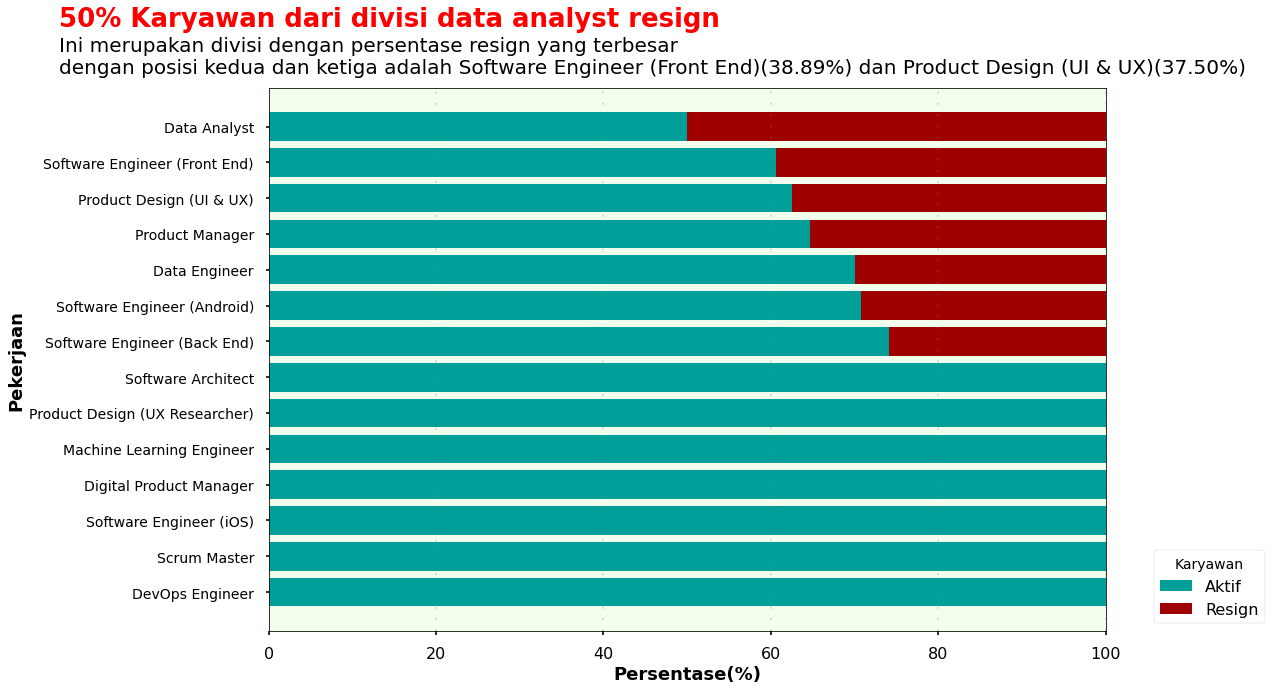

In [56]:
style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(figsize=(15, 10))
x = df_viz_doug['Pekerjaan']
y1 = df_viz_doug['Aktif']
y2 = df_viz_doug['Resign']
ax.barh(x, y1, color='#009f99')
ax.barh(x, y2, left=y1, color='#9f0000')
leg = ax.legend(["Aktif", "Resign"], bbox_to_anchor =(1.2,0), loc='lower right')
leg.set_title('Karyawan',prop={'size':14})

ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=16)

ax.set_facecolor('#f3ffed')
ax.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 6), alpha=0.4)

ax.set_ylabel('Pekerjaan', fontsize=18, fontweight='bold')
ax.set_xlabel('Persentase(%)', fontsize=18, fontweight='bold')

ax.text(x=-25, y=15.8, s='50% Karyawan dari divisi data analyst resign',color='red', fontsize=26, fontweight='bold')
ax.text(x=-25, y=14.5, s='Ini merupakan divisi dengan persentase resign yang terbesar\ndengan posisi kedua dan ketiga adalah Software Engineer (Front End)(38.89%) dan Product Design (UI & UX)(37.50%) ',color='black', fontsize=20)

From the picture above, it is clear that data analysts are the division with the highest percentage of employees, namely 50%. As a result, an investigation into the reasons why employees leave this division will be conducted.   

In [57]:
df_reas = df_drop.copy()

In [58]:
df_reas['TanggalResign'] = df_reas['TanggalResign'].astype(str)

### Reasons for Resigning the Data Analyst Division with the Highest Percentage of Resigns of 50%

In [59]:
dv_da = df_reas[(df_reas['Pekerjaan']=='Data Analyst')&(df_reas['TanggalResign']!='-1')]
dv_da

StatusPernikahan JenisKelamin StatusKepegawaian     Pekerjaan  \
1      Belum_menikah         Pria          FullTime  Data Analyst   
18          Bercerai       Wanita          FullTime  Data Analyst   
86           Menikah       Wanita         Outsource  Data Analyst   
102          Menikah         Pria         Outsource  Data Analyst   
106          Lainnya       Wanita          FullTime  Data Analyst   
108    Belum_menikah       Wanita          FullTime  Data Analyst   
233    Belum_menikah       Wanita          FullTime  Data Analyst   
239    Belum_menikah       Wanita         Outsource  Data Analyst   

              JenjangKarir PerformancePegawai     AsalDaerah  \
1    Freshgraduate_program      Sangat_kurang  Jakarta Utara   
18   Freshgraduate_program       Sangat_bagus  Jakarta Pusat   
86   Freshgraduate_program       Sangat_bagus  Jakarta Timur   
102  Freshgraduate_program       Sangat_bagus  Jakarta Barat   
106  Freshgraduate_program              Bagus  Jakarta Barat   
108  Freshgraduate_program              Biasa  Jakarta Timur   
233  Freshgraduate_program       Sangat_bagus  Jakarta Utara   
239  Freshgraduate_program              Biasa  Jakarta Utara   

         HiringPlatform  SkorSurveyEngagement  SkorKepuasanPegawai  \
1               Website                     4                  4.0   
18   Diversity_Job_Fair                     3                  4.0   
86               Indeed                     3                  5.0   
102       Google_Search                     3                  3.0   
106       CareerBuilder                     4                  3.0   
108       CareerBuilder                     4                  4.0   
233  Diversity_Job_Fair                     4                  3.0   
239       Google_Search                     4                  4.0   

     JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
1                          4.0                                 0.0   
18                         0.0                                 0.0   
86                         7.0                                 0.0   
102                        0.0                                 0.0   
106                        0.0                                 0.0   
108                        0.0                                 0.0   
233                        0.0                                 0.0   
239                        0.0                                 0.0   

     JumlahKetidakhadiran TingkatPendidikan       AlasanResign TanggalLahir  \
1                     3.0           Sarjana      toxic_culture   1984-04-26   
18                   17.0           Sarjana  internal_conflict   1968-05-30   
86                    2.0           Sarjana      toxic_culture   1987-06-14   
102                  20.0           Sarjana      toxic_culture   1984-05-09   
106                  20.0           Sarjana      toxic_culture   1987-01-07   
108                  10.0           Sarjana      toxic_culture   1976-09-22   
233                   4.0          Magister      toxic_culture   1970-02-11   
239                   2.0          Magister  internal_conflict   1989-09-08   

    TanggalHiring        TanggalResign  
1      2014-01-06  2018-06-16 00:00:00  
18     2012-04-02  2017-09-12 00:00:00  
86     2016-10-02  2017-03-15 00:00:00  
102    2012-04-02  2018-06-08 00:00:00  
106    2013-01-07  2014-08-19 00:00:00  
108    2015-03-30  2014-08-19 00:00:00  
233    2009-07-06  2015-06-05 00:00:00  
239    2011-07-11  2017-06-25 00:00:00

#### Jenjang Karir

In [60]:
jkr = dv_da.groupby(['JenjangKarir']).size().reset_index()
jkr.columns = ['JenjangKarir','JumlahKaryawan']
jkr = jkr.sort_values(by='JumlahKaryawan', ascending=False).reset_index(drop=True)
jkr

JenjangKarir  JumlahKaryawan
0  Freshgraduate_program               8

#### Performance

In [61]:
pf = dv_da.groupby(['PerformancePegawai']).size().reset_index()
pf.columns = ['PerformancePegawai','JumlahKaryawan']
pf = pf.sort_values(by='JumlahKaryawan', ascending=False).reset_index(drop=True)
pf

PerformancePegawai  JumlahKaryawan
0       Sangat_bagus               4
1              Biasa               2
2              Bagus               1
3      Sangat_kurang               1

#### Alasan Resign

In [62]:
ar = dv_da.groupby(['AlasanResign']).size().reset_index()
ar.columns = ['AlasanResign','JumlahKaryawan']
ar = ar.sort_values(by='JumlahKaryawan', ascending=False).reset_index(drop=True)
ar

AlasanResign  JumlahKaryawan
0      toxic_culture               6
1  internal_conflict               2

#### Combined

In [63]:
df_rg = dv_da.groupby(['JenjangKarir','PerformancePegawai','AlasanResign']).size().reset_index()
df_rg.columns = ['JenjangKarir','PerformancePegawai','AlasanResign','JumlahKaryawan']
df_rg = df_rg.sort_values(by='JumlahKaryawan', ascending=False).reset_index(drop=True)
df_rg

JenjangKarir PerformancePegawai       AlasanResign  JumlahKaryawan
0  Freshgraduate_program       Sangat_bagus      toxic_culture               3
1  Freshgraduate_program              Bagus      toxic_culture               1
2  Freshgraduate_program              Biasa  internal_conflict               1
3  Freshgraduate_program              Biasa      toxic_culture               1
4  Freshgraduate_program       Sangat_bagus  internal_conflict               1
5  Freshgraduate_program      Sangat_kurang      toxic_culture               1

In [64]:
df_viz_fix = df_rg.copy()

In [65]:
df_viz_fix['JenjangKarir'] = df_viz_fix['JenjangKarir'].replace(['Freshgraduate_program'], 'Fresh Graduate Program')
df_viz_fix['PerformancePegawai'] = df_viz_fix['PerformancePegawai'].replace(['Sangat_bagus','Sangat_kurang'], ['Sangat Bagus','Sangat Kurang'])
df_viz_fix['AlasanResign'] = df_viz_fix['AlasanResign'].replace(['toxic_culture','internal_conflict'], ['Toxic Culture','Internal Conflict'])
df_viz_fix

JenjangKarir PerformancePegawai       AlasanResign  \
0  Fresh Graduate Program       Sangat Bagus      Toxic Culture   
1  Fresh Graduate Program              Bagus      Toxic Culture   
2  Fresh Graduate Program              Biasa  Internal Conflict   
3  Fresh Graduate Program              Biasa      Toxic Culture   
4  Fresh Graduate Program       Sangat Bagus  Internal Conflict   
5  Fresh Graduate Program      Sangat Kurang      Toxic Culture   

   JumlahKaryawan  
0               3  
1               1  
2               1  
3               1  
4               1  
5               1

#### Visualization

In [66]:
fig = px.sunburst(
    df_viz_fix,
    path=['JenjangKarir','PerformancePegawai','AlasanResign'],
    values='JumlahKaryawan',
    hover_data=['JumlahKaryawan'],
    width=700, height=700,
    title='Alasan Resign Pada Divisi Data Analyst'
)
fig.show()

From the information above, it is found that the data analyst division is the division with the highest percentage of resignations, of which 50% are fresh graduates. Three out of eight fresh graduates resigned for reasons of toxic_culter and internal_conflict and it's very unfortunate that these three people are employees with very good performance. This needs to be a lesson for the company's self-improvement so that something like this does not happen again.  
The thing that must be done by the company is to improve the internals of the company so that employees remain comfortable while working. As a result, businesses can engage in a variety of activities that foster a sense of kinship (internally). Moreover, many of the resigning employees are fresh graduates who feel that the environment is toxic and that there are also internal problems.  

## Modeling

In [67]:
data_model = df_drop.copy()
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    285 non-null    object        
 1   JenisKelamin                        285 non-null    object        
 2   StatusKepegawaian                   285 non-null    object        
 3   Pekerjaan                           285 non-null    object        
 4   JenjangKarir                        285 non-null    object        
 5   PerformancePegawai                  285 non-null    object        
 6   AsalDaerah                          285 non-null    object        
 7   HiringPlatform                      285 non-null    object        
 8   SkorSurveyEngagement                285 non-null    int64         
 9   SkorKepuasanPegawai                 285 non-null    float64       
 10  JumlahKeikutsertaanProjek 

In [68]:
data_model['TanggalResign']

0                       -1
1      2018-06-16 00:00:00
2      2014-09-24 00:00:00
3                       -1
4      2018-09-06 00:00:00
              ...         
282                     -1
283    2017-11-15 00:00:00
284    2018-06-08 00:00:00
285    2018-04-01 00:00:00
286                     -1
Name: TanggalResign, Length: 285, dtype: object

### Define Target

Target features can be made from the `TanggalResign` column where when there is a value in that column it means the employee has resigned 1 and vice versa.

In [69]:
data_model['Resign']= np.where((data_model['TanggalResign'].astype(str))!='-1',1,0)
data_model.sample(5)

StatusPernikahan JenisKelamin StatusKepegawaian  \
95     Belum_menikah         Pria          FullTime   
238    Belum_menikah         Pria          FullTime   
120         Bercerai         Pria          FullTime   
15     Belum_menikah       Wanita          FullTime   
61     Belum_menikah         Pria         Outsource   

                         Pekerjaan           JenjangKarir PerformancePegawai  \
95   Software Engineer (Front End)              Mid_level       Sangat_bagus   
238                Product Manager           Senior_level              Bagus   
120       Product Design (UI & UX)  Freshgraduate_program             Kurang   
15   Software Engineer (Front End)           Senior_level      Sangat_kurang   
61   Software Engineer (Front End)              Mid_level       Sangat_bagus   

        AsalDaerah      HiringPlatform  SkorSurveyEngagement  \
95   Jakarta Utara       Google_Search                     3   
238  Jakarta Utara              Indeed                     5   
120  Jakarta Barat              Indeed                     4   
15   Jakarta Utara            LinkedIn                     3   
61   Jakarta Pusat  Diversity_Job_Fair                     3   

     SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
95                   3.0                        0.0   
238                  3.0                        6.0   
120                  3.0                        6.0   
15                   3.0                        0.0   
61                   5.0                        0.0   

     JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran  \
95                                  0.0                   9.0   
238                                 0.0                  17.0   
120                                 0.0                  17.0   
15                                  0.0                   0.0   
61                                  0.0                  20.0   

    TingkatPendidikan       AlasanResign TanggalLahir TanggalHiring  \
95            Sarjana  tidak_bisa_remote   1983-07-28    2014-09-29   
238           Sarjana      masih_bekerja   1975-05-05    2015-03-30   
120          Magister      masih_bekerja   1970-04-25    2017-02-10   
15             Doktor      toxic_culture   1985-03-15    2011-01-10   
61            Sarjana      masih_bekerja   1969-02-24    2011-03-07   

           TanggalResign  Resign  
95   2020-08-19 00:00:00       1  
238                   -1       0  
120                   -1       0  
15   2019-08-04 00:00:00       1  
61                    -1       0

### Feature Extraction

#### usia

The age feature is obtained by subtracting the year 2021 (assuming that the work is done in 2021) from the year of birth of the employee.

In [70]:
data_model['TahunLahir'] = data_model['TanggalLahir'].dt.year
data_model['Usia'] = 2021 -data_model['TahunLahir']
data_model = data_model.drop(['TahunLahir','TanggalLahir'], axis=1)
data_model.head()

StatusPernikahan JenisKelamin StatusKepegawaian  \
0    Belum_menikah         Pria         Outsource   
1    Belum_menikah         Pria          FullTime   
2          Menikah         Pria          FullTime   
3    Belum_menikah         Pria         Outsource   
4    Belum_menikah       Wanita          FullTime   

                       Pekerjaan           JenjangKarir PerformancePegawai  \
0   Software Engineer (Back End)  Freshgraduate_program       Sangat_bagus   
1                   Data Analyst  Freshgraduate_program      Sangat_kurang   
2  Software Engineer (Front End)  Freshgraduate_program              Bagus   
3  Software Engineer (Front End)  Freshgraduate_program              Bagus   
4                Product Manager  Freshgraduate_program              Bagus   

      AsalDaerah     HiringPlatform  SkorSurveyEngagement  \
0  Jakarta Timur  Employee_Referral                     4   
1  Jakarta Utara            Website                     4   
2  Jakarta Timur             Indeed                     4   
3  Jakarta Pusat           LinkedIn                     3   
4  Jakarta Timur           LinkedIn                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran TingkatPendidikan  \
0                                 0.0                   9.0          Magister   
1                                 0.0                   3.0           Sarjana   
2                                 0.0                  11.0          Magister   
3                                 4.0                   6.0           Sarjana   
4                                 0.0                  11.0           Sarjana   

    AlasanResign TanggalHiring        TanggalResign  Resign  Usia  
0  masih_bekerja    2011-01-10                   -1       0    49  
1  toxic_culture    2014-01-06  2018-06-16 00:00:00       1    37  
2      jam_kerja    2011-01-10  2014-09-24 00:00:00       1    47  
3  masih_bekerja    2014-02-17                   -1       0    42  
4    ganti_karir    2013-11-11  2018-09-06 00:00:00       1    47

In [71]:
data_model['Usia'].describe()

count    285.000000
mean      42.403509
std        8.826695
min       29.000000
25%       35.000000
50%       41.000000
75%       48.000000
max       70.000000
Name: Usia, dtype: float64

#### Lama Bekerja

The length of service is obtained from the column `TanggalHiring` - column `TanggalResign`.

In [72]:
data_model['TanggalResign']

0                       -1
1      2018-06-16 00:00:00
2      2014-09-24 00:00:00
3                       -1
4      2018-09-06 00:00:00
              ...         
282                     -1
283    2017-11-15 00:00:00
284    2018-06-08 00:00:00
285    2018-04-01 00:00:00
286                     -1
Name: TanggalResign, Length: 285, dtype: object

Because there is data with a value of '-1' which is because the employee is still working, the value will be filled with '2021-01-01' because from the date set, it is known that the maximum data is in 2020.

In [73]:
data_model['TanggalResign']= data_model['TanggalResign'].astype(str).replace('-1','2021-01-01')
data_model.head()

StatusPernikahan JenisKelamin StatusKepegawaian  \
0    Belum_menikah         Pria         Outsource   
1    Belum_menikah         Pria          FullTime   
2          Menikah         Pria          FullTime   
3    Belum_menikah         Pria         Outsource   
4    Belum_menikah       Wanita          FullTime   

                       Pekerjaan           JenjangKarir PerformancePegawai  \
0   Software Engineer (Back End)  Freshgraduate_program       Sangat_bagus   
1                   Data Analyst  Freshgraduate_program      Sangat_kurang   
2  Software Engineer (Front End)  Freshgraduate_program              Bagus   
3  Software Engineer (Front End)  Freshgraduate_program              Bagus   
4                Product Manager  Freshgraduate_program              Bagus   

      AsalDaerah     HiringPlatform  SkorSurveyEngagement  \
0  Jakarta Timur  Employee_Referral                     4   
1  Jakarta Utara            Website                     4   
2  Jakarta Timur             Indeed                     4   
3  Jakarta Pusat           LinkedIn                     3   
4  Jakarta Timur           LinkedIn                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran TingkatPendidikan  \
0                                 0.0                   9.0          Magister   
1                                 0.0                   3.0           Sarjana   
2                                 0.0                  11.0          Magister   
3                                 4.0                   6.0           Sarjana   
4                                 0.0                  11.0           Sarjana   

    AlasanResign TanggalHiring        TanggalResign  Resign  Usia  
0  masih_bekerja    2011-01-10           2021-01-01       0    49  
1  toxic_culture    2014-01-06  2018-06-16 00:00:00       1    37  
2      jam_kerja    2011-01-10  2014-09-24 00:00:00       1    47  
3  masih_bekerja    2014-02-17           2021-01-01       0    42  
4    ganti_karir    2013-11-11  2018-09-06 00:00:00       1    47

In [74]:
data_model['TanggalResign'] = pd.to_datetime(data_model['TanggalResign'],format='%Y-%m-%d')

In [75]:
data_model['TahunLamaBekerja'] = data_model['TanggalResign'].dt.year - data_model['TanggalHiring'].dt.year 
data_model.head()

StatusPernikahan JenisKelamin StatusKepegawaian  \
0    Belum_menikah         Pria         Outsource   
1    Belum_menikah         Pria          FullTime   
2          Menikah         Pria          FullTime   
3    Belum_menikah         Pria         Outsource   
4    Belum_menikah       Wanita          FullTime   

                       Pekerjaan           JenjangKarir PerformancePegawai  \
0   Software Engineer (Back End)  Freshgraduate_program       Sangat_bagus   
1                   Data Analyst  Freshgraduate_program      Sangat_kurang   
2  Software Engineer (Front End)  Freshgraduate_program              Bagus   
3  Software Engineer (Front End)  Freshgraduate_program              Bagus   
4                Product Manager  Freshgraduate_program              Bagus   

      AsalDaerah     HiringPlatform  SkorSurveyEngagement  \
0  Jakarta Timur  Employee_Referral                     4   
1  Jakarta Utara            Website                     4   
2  Jakarta Timur             Indeed                     4   
3  Jakarta Pusat           LinkedIn                     3   
4  Jakarta Timur           LinkedIn                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran TingkatPendidikan  \
0                                 0.0                   9.0          Magister   
1                                 0.0                   3.0           Sarjana   
2                                 0.0                  11.0          Magister   
3                                 4.0                   6.0           Sarjana   
4                                 0.0                  11.0           Sarjana   

    AlasanResign TanggalHiring TanggalResign  Resign  Usia  TahunLamaBekerja  
0  masih_bekerja    2011-01-10    2021-01-01       0    49                10  
1  toxic_culture    2014-01-06    2018-06-16       1    37                 4  
2      jam_kerja    2011-01-10    2014-09-24       1    47                 3  
3  masih_bekerja    2014-02-17    2021-01-01       0    42                 7  
4    ganti_karir    2013-11-11    2018-09-06       1    47                 5

In [76]:
data_model['TahunLamaBekerja'].describe()

count    285.000000
mean       6.964912
std        2.984496
min       -4.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       15.000000
Name: TahunLamaBekerja, dtype: float64

From the information, it was found that there was data where there was a negative value for length of work. This may be caused by human error, so values less than 0 will be deleted.

In [77]:
data_model[data_model['TahunLamaBekerja']<0]

StatusPernikahan JenisKelamin StatusKepegawaian  \
108    Belum_menikah       Wanita          FullTime   
207          Menikah       Wanita          FullTime   

                         Pekerjaan           JenjangKarir PerformancePegawai  \
108                   Data Analyst  Freshgraduate_program              Biasa   
207  Software Engineer (Front End)              Mid_level       Sangat_bagus   

        AsalDaerah HiringPlatform  SkorSurveyEngagement  SkorKepuasanPegawai  \
108  Jakarta Timur  CareerBuilder                     4                  4.0   
207  Jakarta Pusat         Indeed                     4                  3.0   

     JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
108                        0.0                                 0.0   
207                        5.0                                 0.0   

     JumlahKetidakhadiran TingkatPendidikan   AlasanResign TanggalHiring  \
108                  10.0           Sarjana  toxic_culture    2015-03-30   
207                  17.0           Sarjana     leadership    2017-01-07   

    TanggalResign  Resign  Usia  TahunLamaBekerja  
108    2014-08-19       1    45                -1  
207    2013-05-30       1    49                -4

In [78]:
data_model = data_model.drop(data_model[data_model['TahunLamaBekerja']<0].index)
data_model['TahunLamaBekerja'].describe()

count    283.000000
mean       7.031802
std        2.883503
min        0.000000
25%        6.000000
50%        7.000000
75%        9.000000
max       15.000000
Name: TahunLamaBekerja, dtype: float64

### Feature Encoding

In [79]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 286
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    283 non-null    object        
 1   JenisKelamin                        283 non-null    object        
 2   StatusKepegawaian                   283 non-null    object        
 3   Pekerjaan                           283 non-null    object        
 4   JenjangKarir                        283 non-null    object        
 5   PerformancePegawai                  283 non-null    object        
 6   AsalDaerah                          283 non-null    object        
 7   HiringPlatform                      283 non-null    object        
 8   SkorSurveyEngagement                283 non-null    int64         
 9   SkorKepuasanPegawai                 283 non-null    float64       
 10  JumlahKeikutsertaanProjek 

In [80]:
# Drop Column
'''
Drop the TanggalHiring and ResignDate columns because they are unique for each user.
Drop the HiringPlatform column because it has no relationship with the employee who wants to resign.
drop the AsalDaerah column because seen from all employees are in DKI which is not possible is one
influencing resignations
'''  
data_model =data_model.drop(['TanggalHiring','TanggalResign','AsalDaerah','HiringPlatform','AlasanResign'], axis=1)

#### Label Encoding

Label Encoding is performed on ordinal features, namely `JenjangKarir`, `PerformancePegawai` and `TingkatPendidikan`.

In [81]:
# label encoding JenjangKarir
map_karir = {
    'Freshgraduate_program' : 0,
    'Mid_level' : 1,
    'Senior_level' : 2
}
data_model['JenjangKarir'] = data_model['JenjangKarir'].map(map_karir)

# label encoding PerformancePegawai
map_performance = {
    'Sangat_kurang' : 0,
    'Kurang' : 1,
    'Biasa' : 2,
    'Bagus' : 3,
    'Sangat_bagus' : 4
}
data_model['PerformancePegawai'] = data_model['PerformancePegawai'].map(map_performance)

# label encoding TingkatPendidikan
map_pendidikan = {
    'Sarjana' : 0,
    'Magister' : 1,
    'Doktor' : 2
}
data_model['TingkatPendidikan'] = data_model['TingkatPendidikan'].map(map_pendidikan)

#### One Hot Encoding

Performed on non-ordinal category features such as `JenisKelamin`, `StatusKepegawaian`, `StatusPernikahan` and `Pekerjaan`.

In [82]:
ls_ohe = ['JenisKelamin', 'StatusKepegawaian', 'StatusPernikahan','Pekerjaan']
for i in ls_ohe: 
    ohe = pd.get_dummies(data_model[i], prefix=i)
    data_model = data_model.join(ohe)

In [83]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 286
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   StatusPernikahan                          283 non-null    object 
 1   JenisKelamin                              283 non-null    object 
 2   StatusKepegawaian                         283 non-null    object 
 3   Pekerjaan                                 283 non-null    object 
 4   JenjangKarir                              283 non-null    int64  
 5   PerformancePegawai                        283 non-null    int64  
 6   SkorSurveyEngagement                      283 non-null    int64  
 7   SkorKepuasanPegawai                       283 non-null    float64
 8   JumlahKeikutsertaanProjek                 283 non-null    float64
 9   JumlahKeterlambatanSebulanTerakhir        283 non-null    float64
 10  JumlahKetidakhadiran                  

In [84]:
data_model = data_model.drop(ls_ohe, axis=1)

### Feature Selection

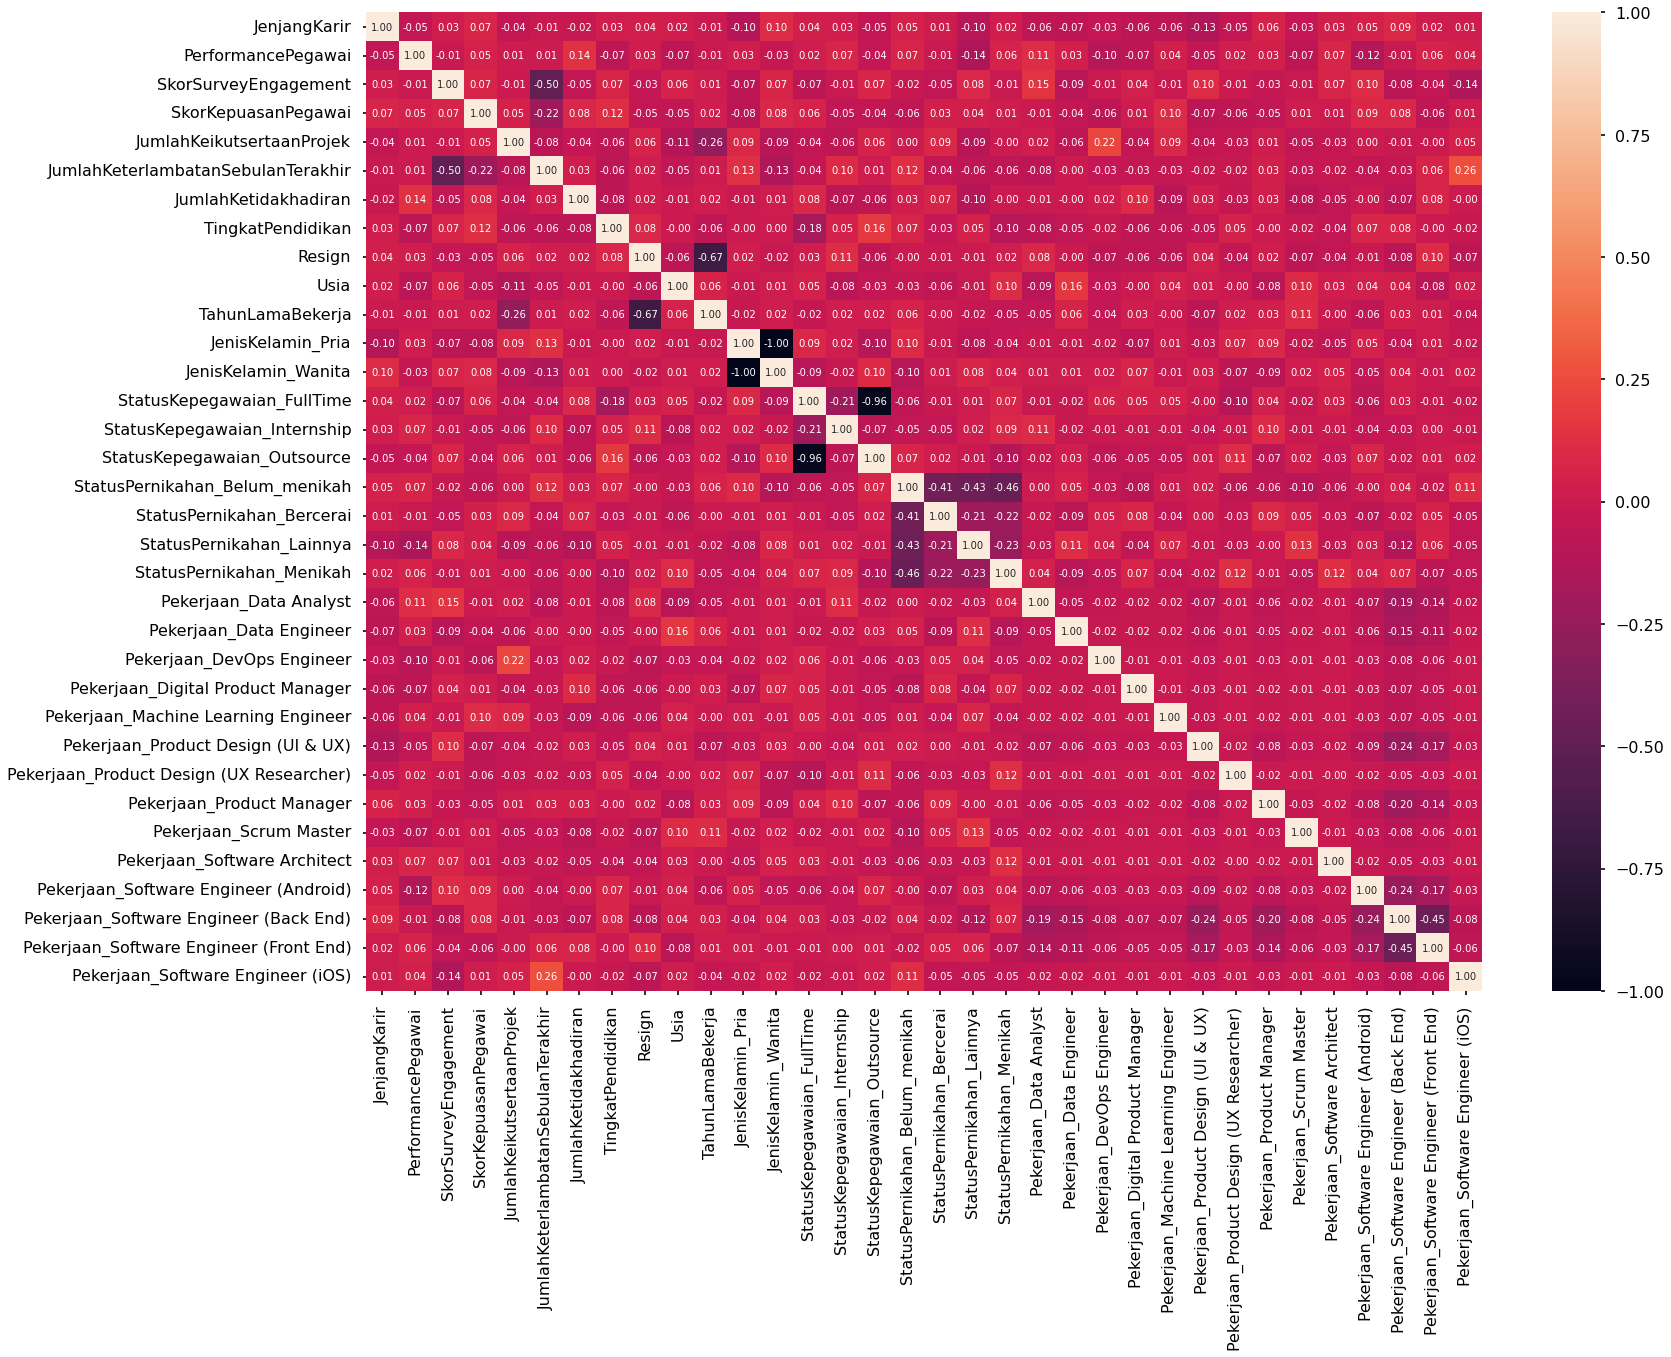

In [85]:
plt.figure(figsize=(25,18))
sns.heatmap(data_model.corr(), annot=True, fmt='.2f')
plt.show()

In [86]:
data_model.isna().sum()

JenjangKarir                                0
PerformancePegawai                          0
SkorSurveyEngagement                        0
SkorKepuasanPegawai                         0
JumlahKeikutsertaanProjek                   0
JumlahKeterlambatanSebulanTerakhir          0
JumlahKetidakhadiran                        0
TingkatPendidikan                           0
Resign                                      0
Usia                                        0
TahunLamaBekerja                            0
JenisKelamin_Pria                           0
JenisKelamin_Wanita                         0
StatusKepegawaian_FullTime                  0
StatusKepegawaian_Internship                0
StatusKepegawaian_Outsource                 0
StatusPernikahan_Belum_menikah              0
StatusPernikahan_Bercerai                   0
StatusPernikahan_Lainnya                    0
StatusPernikahan_Menikah                    0
Pekerjaan_Data Analyst                      0
Pekerjaan_Data Engineer           

### Split Train Test

In [87]:
X = data_model.drop(['Resign'],axis=1)
y = data_model['Resign']

# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)
print(f'Jumlah Data Train : {X_train.shape[0]}')
print(f'Jumlah Data Test: {X_test.shape[0]}')

Jumlah Data Train : 226
Jumlah Data Test: 57


In [88]:
y_train.value_counts()

0    158
1     68
Name: Resign, dtype: int64

From the above information, it is known that the data is imbalanced.

In [89]:
y_test.value_counts()

0    38
1    19
Name: Resign, dtype: int64

### Feature Scaling

In [90]:
ls_scl = ['SkorSurveyEngagement','SkorKepuasanPegawai',
        'JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir',
        'JumlahKetidakhadiran','Usia','TahunLamaBekerja']

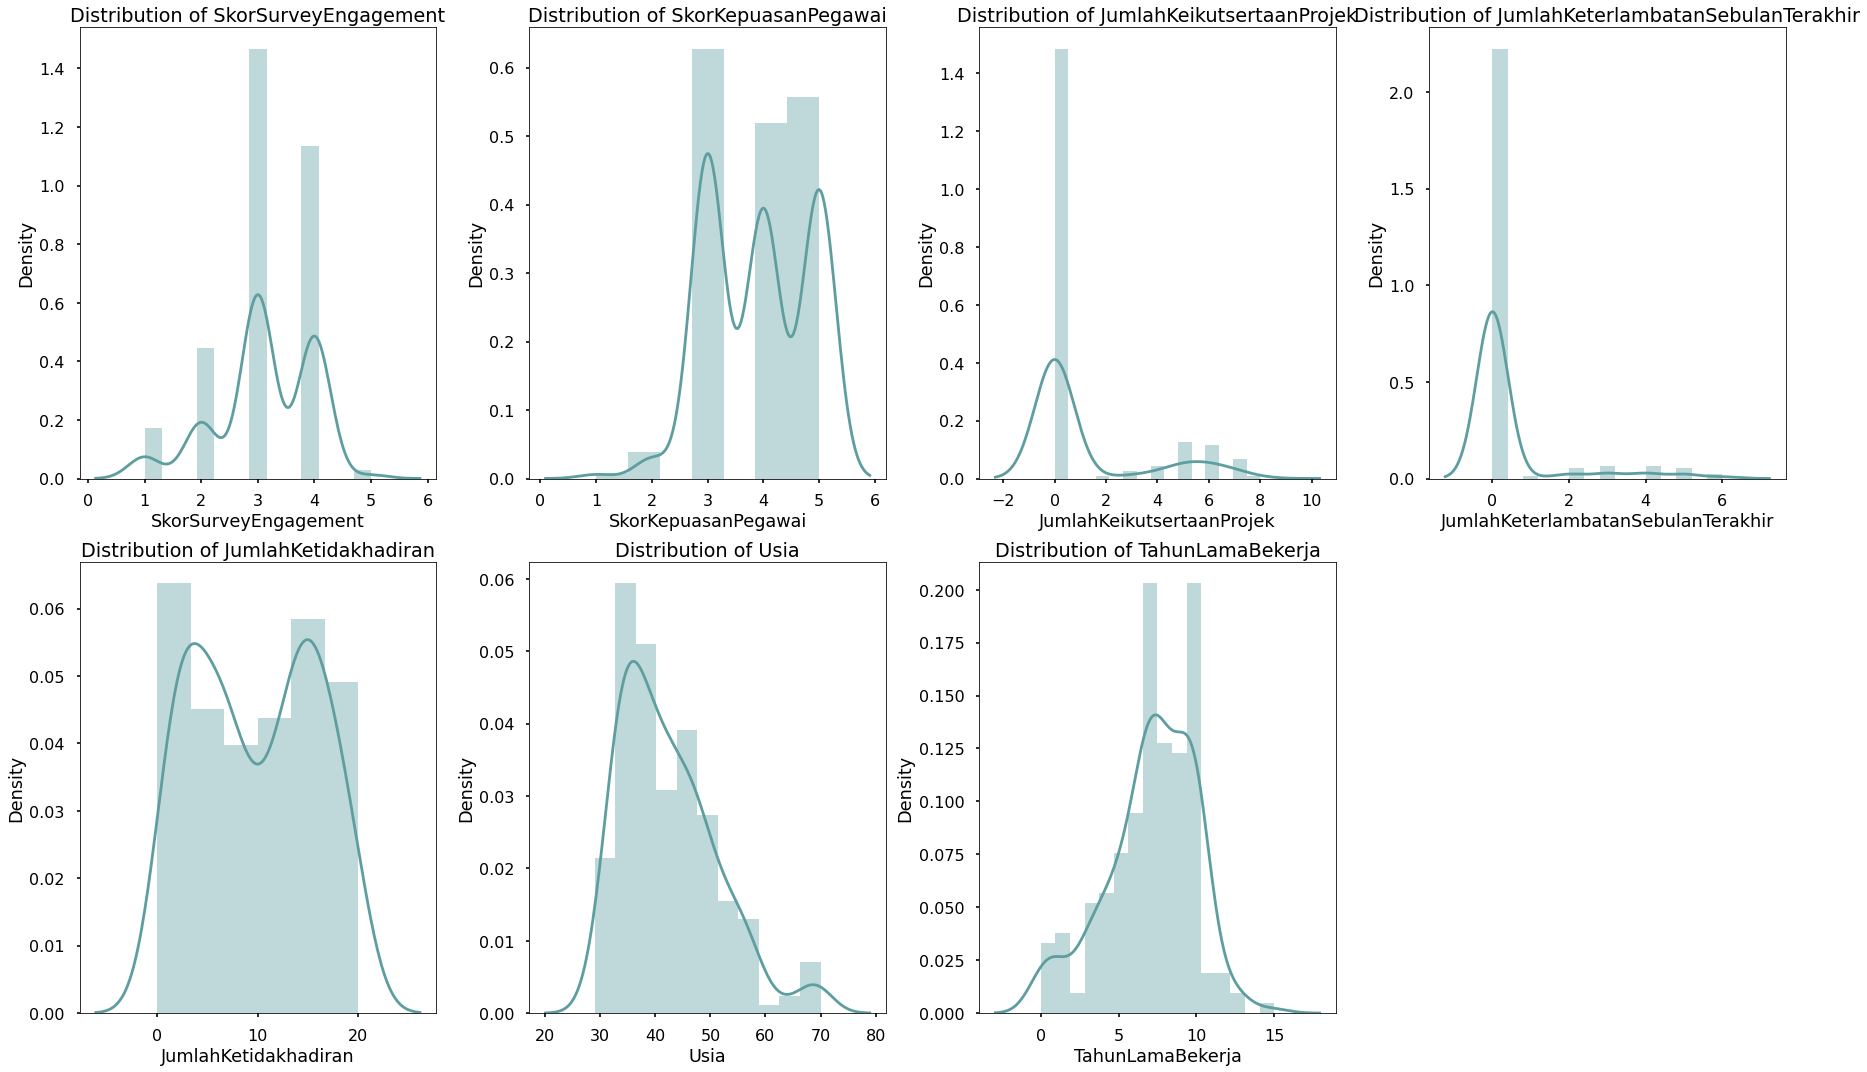

In [91]:
plt.figure(figsize=(25, 15))
for i in range(0, len(ls_scl)):
    plt.subplot(2,4, i+1)
    sns.distplot(X_train[ls_scl[i]], color='cadetblue')
    plt.title('Distribution of {}'.format(ls_scl[i]))
    plt.tight_layout()
plt.show()

#### Train

In [92]:
norm = StandardScaler()
for i in ls_scl:
  X_train['norm_'+i] = norm.fit_transform(X_train[i].values.reshape(len(X_train),1))

X_train =  X_train.drop(ls_scl, axis=1)

#### Test

In [93]:
norm = StandardScaler()
for i in ls_scl:
  X_test['norm_'+i] = norm.fit_transform(X_test[i].values.reshape(len(X_test),1))

X_test =  X_test.drop(ls_scl, axis=1)

### Oversampling

In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 205 to 103
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   JenjangKarir                              226 non-null    int64  
 1   PerformancePegawai                        226 non-null    int64  
 2   TingkatPendidikan                         226 non-null    int64  
 3   JenisKelamin_Pria                         226 non-null    uint8  
 4   JenisKelamin_Wanita                       226 non-null    uint8  
 5   StatusKepegawaian_FullTime                226 non-null    uint8  
 6   StatusKepegawaian_Internship              226 non-null    uint8  
 7   StatusKepegawaian_Outsource               226 non-null    uint8  
 8   StatusPernikahan_Belum_menikah            226 non-null    uint8  
 9   StatusPernikahan_Bercerai                 226 non-null    uint8  
 10  StatusPernikahan_Lainnya            

Because there is imbalanced data, it will be handled by using oversampling.

In [95]:
smoteenn = SMOTE(random_state=42)
X_train_over, y_train_over = smoteenn.fit_resample(X_train, y_train)

In [96]:
X_train_over.shape

(316, 33)

In [97]:
y_train_over.value_counts()

0    158
1    158
Name: Resign, dtype: int64

### Data Modeling

In [98]:
# Algoritma Machine Learning
logreg = LogisticRegression() 
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
grad = GradientBoostingClassifier()
xg = XGBClassifier()
MLA = [logreg, knn, dtc, rf, grad, xg]

In [99]:
# Create model evaluation results in the form of a Data Frame
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    start = dt.now()
    predicted = alg.fit(X_train_over, y_train_over).predict(X_test)
    y_pred_proba_test = alg.fit(X_train_over, y_train_over).predict_proba(X_test)
    y_pred_proba_train = alg.fit(X_train_over, y_train_over).predict_proba(X_train_over)
    score = cross_validate(alg, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy (%)'] = round(alg.score(X_train_over, y_train_over), 3)*100
    MLA_compare.loc[row_index, 'Test Accuracy (%)'] = round(alg.score(X_test, y_test), 3)*100
    MLA_compare.loc[row_index, 'Precission (%)'] = round(precision_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'Recall (%)'] = round(recall_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'F1-Score (%)'] = round((f1_score(y_test, predicted)),3)*100
    MLA_compare.loc[row_index, 'roc-auc (test prob)'] = round((roc_auc_score(y_test, y_pred_proba_test[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (train prob)'] = round((roc_auc_score(y_train_over, y_pred_proba_train[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval train)'] = round(score['train_score'].mean(),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval test)'] = round(score['test_score'].mean(),3)
    MLA_compare.loc[row_index, 'Time used'] = (dt.now()-start).total_seconds()

    row_index+=1

In [100]:
MLA_compare

MLA used  Train Accuracy (%)  Test Accuracy (%)  \
0          LogisticRegression                88.9               77.2   
1        KNeighborsClassifier                88.9               71.9   
2      DecisionTreeClassifier               100.0               84.2   
3      RandomForestClassifier               100.0               75.4   
4  GradientBoostingClassifier                98.7               75.4   
5               XGBClassifier               100.0               82.5   

   Precission (%)  Recall (%)  F1-Score (%)  roc-auc (test prob)  \
0            66.7        63.2          64.9                0.895   
1            57.1        63.2          60.0                0.775   
2            66.7        84.2          74.4                0.711   
3            60.9        73.7          66.7                0.873   
4            60.0        78.9          68.2                0.868   
5            69.6        84.2          76.2                0.904   

   roc-auc (train prob)  roc-auc (crossval train)  roc-auc (crossval test)  \
0                 0.964                     0.938                    0.900   
1                 0.975                     0.923                    0.812   
2                 1.000                     1.000                    0.773   
3                 1.000                     1.000                    0.880   
4                 0.999                     0.999                    0.887   
5                 1.000                     1.000                    0.885   

   Time used  
0   1.239934  
1   0.226989  
2   0.143992  
3   2.672858  
4   1.546917  
5   1.338929

From the several algorithms used, it is found that the Logistic Regression algorithm has good performance compared to other algorithms. However, from the ROC-AUC train test, it can be seen that all models are overfitted, so hyperparameters will be used to overcome overfitting.

#### Tuning Hyperparameter

In [101]:
#Evaluation for tuned model
def evaluation_tuned(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train,y_pred_proba_train[:,1]),3)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba_test[:,1]),3)}\n')
    print('='*30)
    
    print('Others Metrics Evaluation:')
    print(f'Train Accuracy Score : {round(accuracy_score(y_train,y_pred_train),3)}')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),3)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),3)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),3)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),3)}\n')
    print('='*30)
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, model.predict(X_test)))
    print('='*30)

    print(f'Best Parameter: {model.best_params_}')



##### Logistic Regression

In [102]:
pipeline_logreg = Pipeline([('smt', SMOTE(random_state=42)),
                            ('logreg', LogisticRegression())])

logreg_hyparameters = {"logreg__penalty": ['l1', 'l2','elasticnet'],
                       "logreg__C":[float(x) for x in np.linspace(0.001, 10, 100)],
                       "logreg__solver" : ['newton-cg', 'lbfgs', 'liblinear']
                       }

tuned_logreg = RandomizedSearchCV(pipeline_logreg, logreg_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')

tuned_logreg.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('logreg', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'logreg__C': [0.001,
                                                      0.10200000000000001,
                                                      0.203,
                                                      0.30400000000000005,
                                                      0.405, 0.506,
                                                      0.6070000000000001,
                                                      0.7080000000000001, 0.809,
                                                      0.91, 1.011,
                                                      1.1119999999999999, 1.213,
                                                      1.314, 1.415, 1.516,
                                                      1.617, 1.718, 

In [103]:
evaluation_tuned(tuned_logreg)

AUC Score Train vs Test:
AUC Score Train proba: 0.931
AUC Score Test proba: 0.903

Others Metrics Evaluation:
Train Accuracy Score : 0.872
Test Accuracy Score : 0.789
Precision Score Test: 0.684
Recall Score Test : 0.684
F1 Score Test : 0.684

**CONFUSION MATRIX**
[[32  6]
 [ 6 13]]
Best Parameter: {'logreg__solver': 'liblinear', 'logreg__penalty': 'l1', 'logreg__C': 1.213}


##### KNeighborsClassifier

In [104]:
# define models and parameters
pipiline_knn = Pipeline([('smt', SMOTE(random_state=42)),
                            ('knn', KNeighborsClassifier())])

knn_hyparameters = {"knn__n_neighbors": list(np.arange(1, 21, 2)),
                       "knn__weights":['uniform', 'distance'],
                       "knn__metric" : ['euclidean', 'manhattan', 'minkowski']
                       }

tuned_knn = RandomizedSearchCV(pipiline_knn, knn_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')

tuned_knn.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('knn', KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan',
                                                        'minkowski'],
                                        'knn__n_neighbors': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 19],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42, scoring='roc_auc')

In [105]:
evaluation_tuned(tuned_knn)

AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.756

Others Metrics Evaluation:
Train Accuracy Score : 1.0
Test Accuracy Score : 0.684
Precision Score Test: 0.522
Recall Score Test : 0.632
F1 Score Test : 0.571

**CONFUSION MATRIX**
[[27 11]
 [ 7 12]]
Best Parameter: {'knn__weights': 'distance', 'knn__n_neighbors': 13, 'knn__metric': 'euclidean'}


##### DecisionTreeClassifier

In [106]:
# define models and parameters
pipiline_dct = Pipeline([('smt', SMOTE(random_state=42)),
                            ('dct', DecisionTreeClassifier())])

dct_hyparameters = {"dct__criterion" : ['gini', 'entropy', 'log_loss'],
                    "dct__max_depth" : [int(x) for x in np.linspace(1, 110, num = 30)],
                    "dct__min_samples_split" : [2, 5, 10, 100],
                    "dct__min_samples_leaf" : [1, 2, 4, 10, 20, 50]
                    }
tuned_dct = RandomizedSearchCV(pipiline_dct, dct_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')

tuned_dct.fit(X_train,y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('dct',
                                              DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'dct__criterion': ['gini', 'entropy',
                                                           'log_loss'],
                                        'dct__max_depth': [1, 4, 8, 12, 16, 19,
                                                           23, 27, 31, 34, 38,
                                                           42, 46, 49, 53, 57,
                                                           61, 64, 68, 72, 76,
                                                           79, 83, 87, 91, 94,
                                                           98, 102, 106, 110],
                                        'dct__min_samples_leaf': [1, 2, 4, 10,
                                   

In [107]:
evaluation_tuned(tuned_dct)

AUC Score Train vs Test:
AUC Score Train proba: 0.923
AUC Score Test proba: 0.823

Others Metrics Evaluation:
Train Accuracy Score : 0.867
Test Accuracy Score : 0.754
Precision Score Test: 0.632
Recall Score Test : 0.632
F1 Score Test : 0.632

**CONFUSION MATRIX**
[[31  7]
 [ 7 12]]
Best Parameter: {'dct__min_samples_split': 10, 'dct__min_samples_leaf': 20, 'dct__max_depth': 49, 'dct__criterion': 'gini'}


##### RandomForestClassifier

In [108]:
# define models and parameters
pipiline_rfm = Pipeline([('smt', SMOTE(random_state=42)),
                            ('rfm', RandomForestClassifier())])

rfm_hyparameters = {"rfm__n_estimators" :  [1, 2, 5, 7,9,11, 13,15,17],
                    "rfm__criterion" : ['gini', 'entropy'],
                    "rfm__max_depth" : [int(x) for x in np.linspace(3, 50, 10)],
                    "rfm__min_samples_split" : [int(x) for x in np.linspace(5, 100, 10)],
                    "rfm__min_samples_leaf": [int(x) for x in np.linspace(5, 100, 10)],
                     "rfm__max_features":['auto','sqrt']
                    }
tuned_rfm = RandomizedSearchCV(pipiline_rfm, rfm_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')

tuned_rfm.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('rfm',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'rfm__criterion': ['gini', 'entropy'],
                                        'rfm__max_depth': [3, 8, 13, 18, 23, 29,
                                                           34, 39, 44, 50],
                                        'rfm__max_features': ['auto', 'sqrt'],
                                        'rfm__min_samples_leaf': [5, 15, 26, 36,
                                                                  47, 57, 68,
                                                                  78, 89, 100],
                                        'rfm__min_samples_split': [5, 15, 26,
                                                                   36, 47, 57,
                            

In [109]:
evaluation_tuned(tuned_rfm)

AUC Score Train vs Test:
AUC Score Train proba: 0.851
AUC Score Test proba: 0.782

Others Metrics Evaluation:
Train Accuracy Score : 0.814
Test Accuracy Score : 0.719
Precision Score Test: 0.556
Recall Score Test : 0.789
F1 Score Test : 0.652

**CONFUSION MATRIX**
[[26 12]
 [ 4 15]]
Best Parameter: {'rfm__n_estimators': 7, 'rfm__min_samples_split': 5, 'rfm__min_samples_leaf': 78, 'rfm__max_features': 'auto', 'rfm__max_depth': 8, 'rfm__criterion': 'gini'}


##### GradientBoostingClassifier

In [110]:
# define models and parameters
pipiline_grad = Pipeline([('smt', SMOTE(random_state=42)),
                            ('grad', GradientBoostingClassifier())])

grad_hyparameters = {"grad__n_estimators" :  [10, 100, 200, 1000],
                    "grad__learning_rate" : [0.001, 0.01, 0.1],
                    "grad__subsample" : [0.5, 0.7, 1.0],
                    "grad__max_depth" : [3, 7, 9]
                    }
tuned_grad = RandomizedSearchCV(pipiline_grad, grad_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')

tuned_grad.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('grad',
                                              GradientBoostingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'grad__learning_rate': [0.001, 0.01,
                                                                0.1],
                                        'grad__max_depth': [3, 7, 9],
                                        'grad__n_estimators': [10, 100, 200,
                                                               1000],
                                        'grad__subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='roc_auc')

In [111]:
evaluation_tuned(tuned_grad)

AUC Score Train vs Test:
AUC Score Train proba: 0.964
AUC Score Test proba: 0.875

Others Metrics Evaluation:
Train Accuracy Score : 0.876
Test Accuracy Score : 0.789
Precision Score Test: 0.667
Recall Score Test : 0.737
F1 Score Test : 0.7

**CONFUSION MATRIX**
[[31  7]
 [ 5 14]]
Best Parameter: {'grad__subsample': 0.7, 'grad__n_estimators': 1000, 'grad__max_depth': 3, 'grad__learning_rate': 0.001}


##### XGBClassifier

In [112]:
pipeline_xgboost = Pipeline([('smt', SMOTE(random_state=42)),
                             ('xgb', XGBClassifier(random_state=42))])

xgb_hyparameters = {'xgb__max_depth' : [int(x) for x in np.linspace(3,30,5)],
                        'xgb__min_child_weight' : [int(x) for x in np.linspace(1,10,11)],
                        'xgb__gamma' : [float(x) for x in np.linspace(0,1,11)],
                        'xgb__tree_method' : ['auto', 'exact', 'approx', 'hist'],
                        'xgb__colsample_bytree' : [float(x) for x in np.linspace(0,1,11)],
}

tuned_xgb = RandomizedSearchCV(pipeline_xgboost, xgb_hyparameters, cv = 5, random_state=42, 
                                   n_jobs=-1, scoring='roc_auc')
tuned_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                   

In [113]:
evaluation_tuned(tuned_xgb)

AUC Score Train vs Test:
AUC Score Train proba: 0.967
AUC Score Test proba: 0.873

Others Metrics Evaluation:
Train Accuracy Score : 0.898
Test Accuracy Score : 0.754
Precision Score Test: 0.609
Recall Score Test : 0.737
F1 Score Test : 0.667

**CONFUSION MATRIX**
[[29  9]
 [ 5 14]]
Best Parameter: {'xgb__tree_method': 'approx', 'xgb__min_child_weight': 6, 'xgb__max_depth': 16, 'xgb__gamma': 0.8, 'xgb__colsample_bytree': 0.9}


#### Perbandingan Hasil Model

In [114]:
#Create model evaluation results in the form of a Data Frame
MLA = [tuned_logreg, tuned_knn, tuned_dct, tuned_rfm, tuned_grad, tuned_xgb]
MLA_name = ['Tuned LogisticRegression','Tuned KNN', 'Tuned DecisionTree', 'Tunde RandomForest', 'Tuned GradientBoostingClassifier', 'Tuned XGBClassifier']

# DataFrame Nama Algoritma
MLA_name_columns = []
MLA_compare_name = pd.DataFrame(columns = MLA_name_columns)
row_index = 0
for name in MLA_name:
    MLA_compare_name.loc[row_index,'MLA used'] = name
    row_index+=1

# DataFrame Matrix Evaluation
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
for alg in MLA: 
    predicted = alg.fit(X_train, y_train).predict(X_test)
    y_pred_proba_test = alg.fit(X_train, y_train).predict_proba(X_test)
    y_pred_proba_train = alg.fit(X_train, y_train).predict_proba(X_train)
    MLA_compare.loc[row_index, 'Accuracy'] = round(alg.score(X_test, y_test), 3)
    MLA_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),3)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),3)
    MLA_compare.loc[row_index, 'F1-Score'] = round((f1_score(y_test, predicted)),3)
    MLA_compare.loc[row_index, 'ROC-AUC (Test Prob)'] = round((roc_auc_score(y_test, y_pred_proba_test[:, 1])),3)
    MLA_compare.loc[row_index, 'ROC-AUC (Train Prob)'] = round((roc_auc_score(y_train, y_pred_proba_train[:, 1])),3)
    row_index+=1

# Combined
df_eval = pd.concat([MLA_compare_name, MLA_compare],axis=1)


In [115]:
df_eval 

MLA used  Accuracy  Precission  Recall  F1-Score  \
0          Tuned LogisticRegression     0.903       0.684   0.684     0.684   
1                         Tuned KNN     0.756       0.522   0.632     0.571   
2                Tuned DecisionTree     0.823       0.632   0.632     0.632   
3                Tunde RandomForest     0.773       0.577   0.789     0.667   
4  Tuned GradientBoostingClassifier     0.877       0.700   0.737     0.718   
5               Tuned XGBClassifier     0.873       0.609   0.737     0.667   

   ROC-AUC (Test Prob)  ROC-AUC (Train Prob)  
0                0.903                 0.931  
1                0.756                 1.000  
2                0.823                 0.923  
3                0.730                 0.844  
4                0.875                 0.964  
5                0.873                 0.967

Text(0.5, 1.0, 'Model Comparison\n')

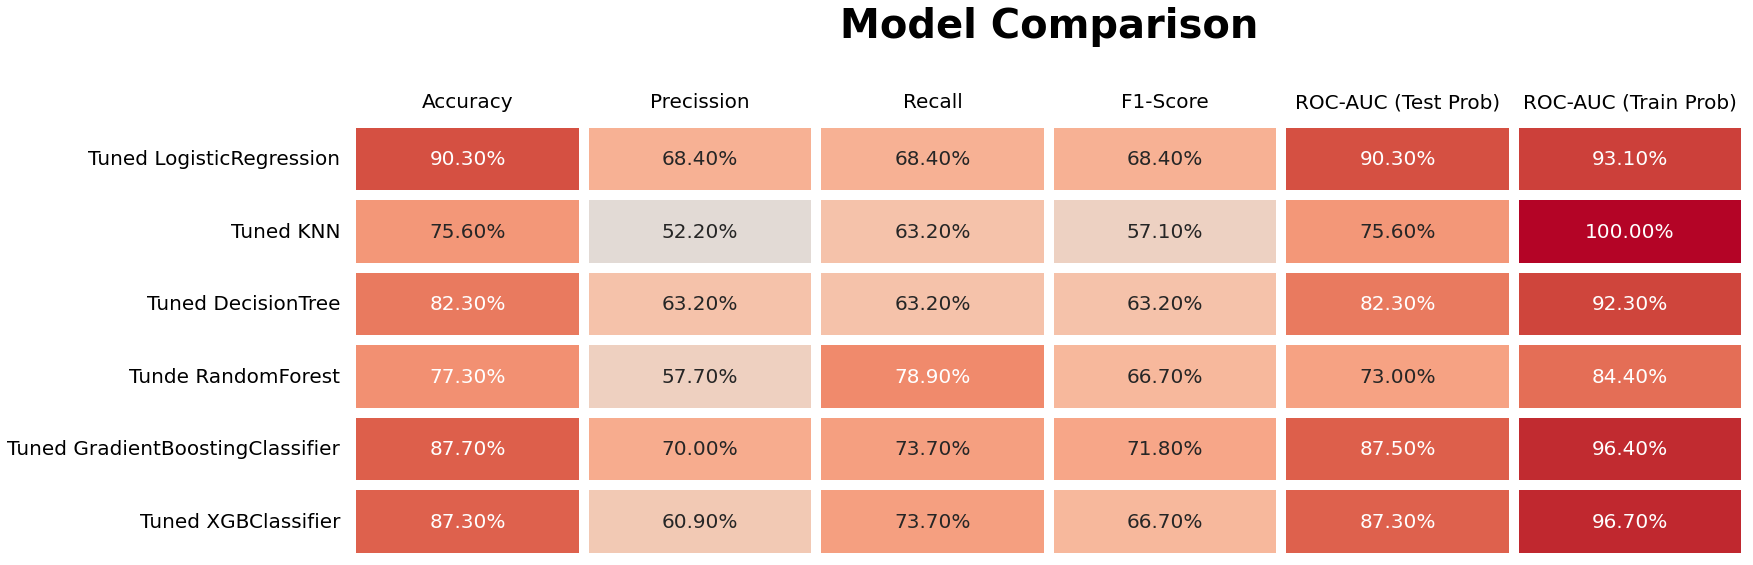

In [116]:
# Comparison
style.use('seaborn-v0_8-poster')
algo = list(df_eval['MLA used'])
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(df_eval.iloc[:, 1:], annot=True, fmt=".2%", vmin=0, vmax=1, 
            linewidths=10, cmap='coolwarm', cbar=False, annot_kws={"fontsize":20},
            yticklabels=algo)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), size=20)
ax.set_yticklabels(ax.get_yticklabels(), size=20)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_title('Model Comparison\n', weight='bold', fontsize=40)

From the results of several hyperparameter tunings, the model chosen is a model with a logistic regression algorithm because it has good performance compared to other models. It can be seen that the difference between the AUC train and test is not far, so this model is not overfitting or underfitting while the other models are still overfitting. Apart from that, evaluation metrics such as accuracy, precision, recall, and f1-score also have better values than the other models (can be seen as follows).  

AUC Score Train proba: 0.931  
AUC Score Test proba: 0.903   
Train Accuracy Score : 0.872  
Test Accuracy Score : 0.789  
Precision Score Test: 0.684  
Recall Score Test : 0.684  
F1 Score Test : 0.684   

#### Feature Importance

In [117]:
#Evaluation for model
def evaluation(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train,y_pred_proba_train[:,1]),3)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba_test[:,1]),3)}\n')
    print('='*30)
    
    print('Others Metrics Evaluation:')
    print(f'Train Accuracy Score : {round(accuracy_score(y_train,y_pred_train),3)}')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),3)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),3)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),3)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),3)}\n')
    print('='*30)
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, model.predict(X_test)))

In [118]:
logreg = LogisticRegression(C= 0.405, penalty = 'l2', solver= 'newton-cg') 
logreg.fit(X_train_over, y_train_over)
evaluation(logreg)

AUC Score Train vs Test:
AUC Score Train proba: 0.929
AUC Score Test proba: 0.896

Others Metrics Evaluation:
Train Accuracy Score : 0.867
Test Accuracy Score : 0.772
Precision Score Test: 0.667
Recall Score Test : 0.632
F1 Score Test : 0.649

**CONFUSION MATRIX**
[[32  6]
 [ 7 12]]


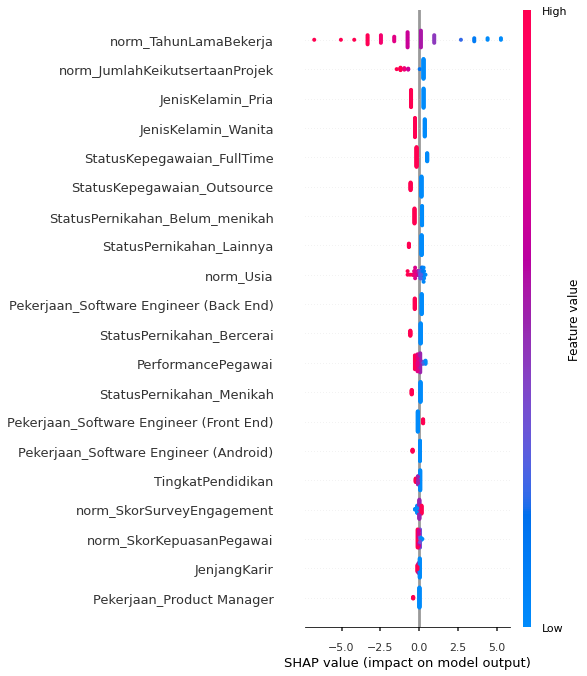

In [119]:
# feature importance with shape
shap.initjs()
explainer = shap.Explainer(logreg, X_train_over)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

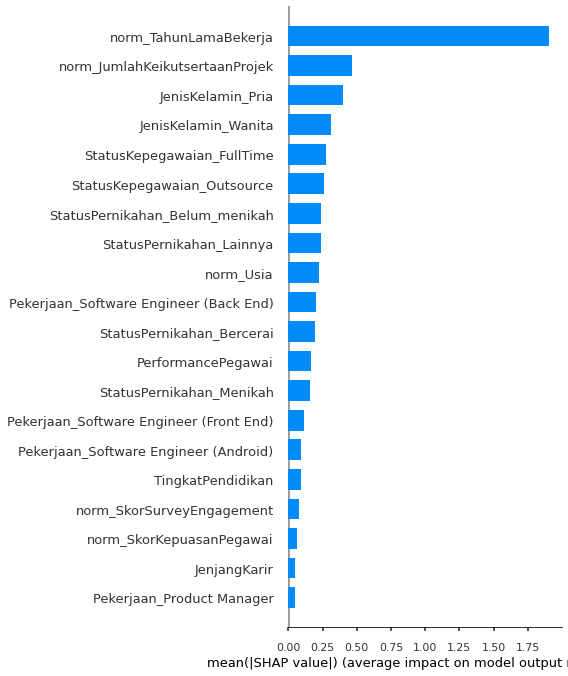

In [120]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [122]:
X_train_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   JenjangKarir                              316 non-null    int64  
 1   PerformancePegawai                        316 non-null    int64  
 2   TingkatPendidikan                         316 non-null    int64  
 3   JenisKelamin_Pria                         316 non-null    uint8  
 4   JenisKelamin_Wanita                       316 non-null    uint8  
 5   StatusKepegawaian_FullTime                316 non-null    uint8  
 6   StatusKepegawaian_Internship              316 non-null    uint8  
 7   StatusKepegawaian_Outsource               316 non-null    uint8  
 8   StatusPernikahan_Belum_menikah            316 non-null    uint8  
 9   StatusPernikahan_Bercerai                 316 non-null    uint8  
 10  StatusPernikahan_Lainnya              

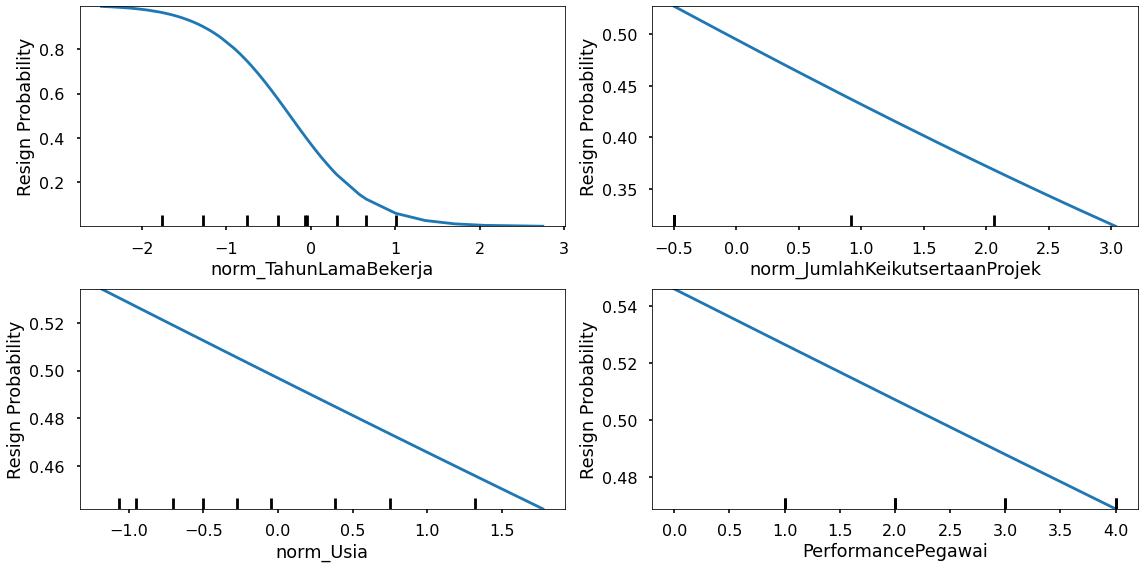

In [129]:
from sklearn.inspection import plot_partial_dependence
# We try to compare 4 features using partial dependence
style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(2,2, figsize=(16, 8))
pdp1 = plot_partial_dependence(logreg, X_train_over, ["norm_TahunLamaBekerja"], ax=ax[0,0])
pdp1.axes_[0,0].set_ylabel("Resign Probability")
pdp1.axes_[0,0].set_xlabel("norm_TahunLamaBekerja")
pdp2 = plot_partial_dependence(logreg, X_train_over, ["norm_JumlahKeikutsertaanProjek"], ax=ax[0,1])
pdp2.axes_[0,0].set_ylabel("Resign Probability")
pdp2.axes_[0,0].set_xlabel("norm_JumlahKeikutsertaanProjek")
pdp3 = plot_partial_dependence(logreg, X_train_over, ["norm_Usia"], ax=ax[1,0])
pdp3.axes_[0,0].set_ylabel("Resign Probability")
pdp3.axes_[0,0].set_xlabel("norm_Usia")
pdp4 = plot_partial_dependence(logreg, X_train_over, ["PerformancePegawai"], ax=ax[1,1])
pdp4.axes_[0,0].set_ylabel("Resign Probability")
pdp4.axes_[0,0].set_xlabel("PerformancePegawai")
plt.tight_layout()
plt.show()

From the importance of features and  partial dependence, it can be seen that:  
* The TahunLamaBekerja feature is the most important feature. From this, it can be seen that there is a tendency where employees who resign are employees who have worked for a long time with little value, which means that employees who tend to resign are employees who work for a short time.  
* Number of JumlahKeikutsertaanProjek is the second important feature where employees who tend to resign are employees who have never participated in a project.  
* Young employees have a high chance of resigning compared to old age.  
* Employees who have low performance have a higher chance of resigning compared to employees who have high performance.  

## Business Recommendation

As is well known, employees who tend to resign are those who have worked for a short time and have never participated in a project. Therefore, what companies can do to prevent employees from resigning is to make employees feel at home working with the company. For this reason, companies can do the following:

* Improve internally, as it is known that 50% of those who resign in the data analyst division have reasons related to internal, by carrying out activities that can strengthen the company's internal (employees with the company).    
* Give appreciation in the form of loyalty on a regular basis to employees who have been working for a long time (> 10 years).  
* Provide projects to employees evenly (at least once) so that all employees can feel they have contributed to the project.  
* Evaluate the work system that is implemented so that employees are comfortable at work.  
* Companies should focus on retaining young employees because they are more likely to resign than older employees.   

By implementing the above actions, it is possible that the rate of employee resignation can be reduced.